In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv("/Users/prosenjeetsaha/Desktop/Code-2025/Plastic Waste Around the World.csv")

In [7]:
df.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [9]:
#top polluting countries in terms of total plastic waste
top_polluting_countries = df.sort_values(by='Total_Plastic_Waste_MT',ascending=False)[['Country','Total_Plastic_Waste_MT']].head(10)
top_polluting_countries

,Country,Total_Plastic_Waste_MT
0,China,59.08
1,United States,42.02
2,India,26.33
3,Japan,7.99
4,Germany,6.28
5,Brazil,5.96
6,Indonesia,5.85
7,Russia,5.84
8,United Kingdom,5.03
9,France,4.98


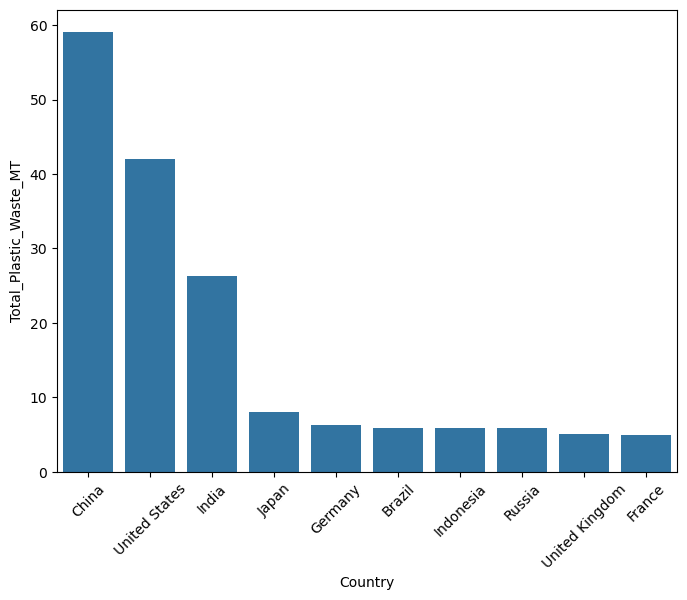

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_polluting_countries,x='Country',y='Total_Plastic_Waste_MT')
plt.xlabel='Country'
plt.ylabel='Total_Plastic_Waste_MT'
plt.xticks(rotation=45)
plt.title="Top 10 countries in terms of total pollution"
plt.show()

In [13]:
#top 10 polluting countries per capita waste KG

top_10_polluting_per_capita = df.sort_values(by='Per_Capita_Waste_KG',ascending=False)[['Country','Per_Capita_Waste_KG']].head(10)
top_10_polluting_per_capita

,Country,Per_Capita_Waste_KG
79,Iceland,1564.4
78,Malta,1331.5
76,Montenegro,1004.8
77,Luxembourg,957.8
164,Nauru,927.8
163,Tuvalu,833.3
72,Estonia,534.6
75,Cyprus,531.1
74,Trinidad and Tobago,478.6
162,Palau,437.2


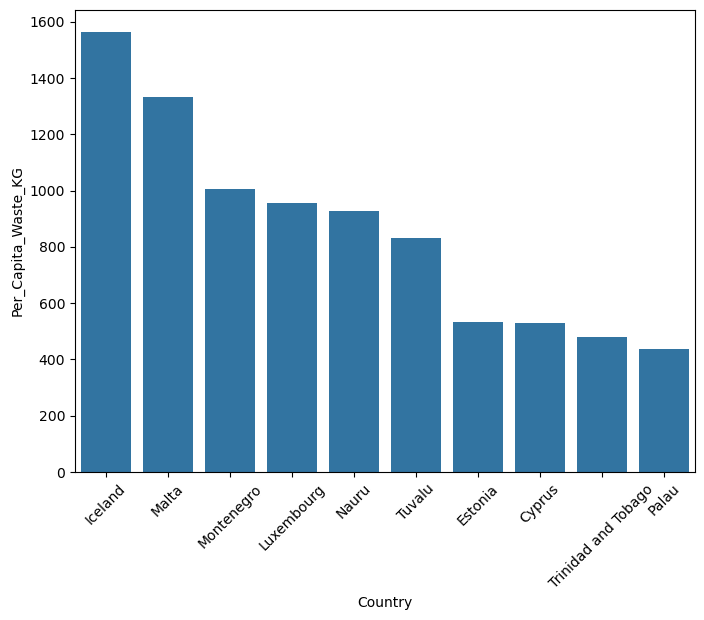

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_10_polluting_per_capita,x='Country',y='Per_Capita_Waste_KG')
plt.xlabel='Country'
plt.ylabel = 'Waste per capita KG'
plt.title = "Top 10 polluting countries per capita"
plt.xticks(rotation=45)
plt.show()

In [17]:
#What category of pollutants are polluting the environment the most?
main_sources = df['Main_Sources'].value_counts(normalize=True)
main_sources

Main_Sources
Consumer_Packaging       0.793939
Industrial_Packaging     0.084848
Packaging_Consumer       0.030303
Packaging_Industrial     0.024242
Industrial_Consumer      0.024242
Food_Packaging           0.018182
Consumer_Goods           0.006061
Packaging_Electronics    0.006061
Automotive_Packaging     0.006061
Electronics_Packaging    0.006061
Name: proportion, dtype: float64

In [19]:
top_10_recycle_countries = df.sort_values(by='Recycling_Rate',ascending=False)[['Country','Recycling_Rate']].head(10)
top_10_recycle_countries

,Country,Recycling_Rate
3,Japan,84.8
44,Singapore,59.8
14,South Korea,59.1
33,Austria,56.4
4,Germany,56.1
22,Netherlands,55.9
79,Iceland,55.6
32,Sweden,50.6
77,Luxembourg,48.9
8,United Kingdom,46.2


In [21]:
pip install countryinfo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
from countryinfo import CountryInfo

In [25]:
df.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [27]:
continents = []
for i in df['Country']:
    try:
        info = CountryInfo(i)
        continent = info.region()
    except KeyError:
        continent = None
    continents.append(continent)    
df['Continents'] = continents
df.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Continents
0,China,59.08,Packaging_Industrial,29.8,41.2,High,Asia
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium,Americas
2,India,26.33,Consumer_Goods,11.5,19.3,High,Asia
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium,Asia
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low,Europe


In [29]:
df.query("Continents.isnull()")

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Continents
76,Montenegro,0.63,Consumer_Packaging,3.4,1004.8,Medium,None
82,Myanmar,0.51,Consumer_Packaging,2.1,9.3,High,None
106,Eswatini,0.03,Consumer_Packaging,1.2,25.6,Low,None
112,Sao Tome and Principe,0.01,Consumer_Packaging,0.8,45.2,High,None
128,Republic of Congo,0.08,Consumer_Packaging,0.9,14.2,High,None
129,Democratic Republic of Congo,0.24,Consumer_Packaging,0.4,2.6,Medium,None
133,Gambia,0.02,Consumer_Packaging,0.5,8.1,High,None
138,North Macedonia,0.29,Consumer_Packaging,17.8,139.2,Low,None
140,Kosovo,0.21,Consumer_Packaging,8.9,115.7,Low,None
161,Micronesia,0.01,Consumer_Packaging,1.5,86.3,High,None


In [31]:
df.loc[df['Country'].isin(['Kosovo','North Macedonia','Montenegro']),'Continents'] ='Europe'
df.loc[df['Country'].isin(['Eswatini','Sao Tome and Principe','Republic of Congo','Democratic Republic of Congo','Gambia']),'Continents'] ='Europe'
df.loc[df['Country']=='Myanmar','Continents'] = 'Asia'
df.loc[df['Country']=='Micronesia','Continents']= 'Oceania'

In [33]:
df.query('Continents.isnull()')

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Continents


In [35]:
#Find out which continent pollutes the most

df.groupby('Continents').agg({'Total_Plastic_Waste_MT':'sum'}).reset_index().sort_values(by='Total_Plastic_Waste_MT',ascending=False)

,Continents,Total_Plastic_Waste_MT
2,Asia,135.50
1,Americas,69.36
3,Europe,63.22
0,Africa,14.24
4,Oceania,2.06


In [39]:
#Find out the average recycling rate per continent
df.groupby('Continents').agg({'Recycling_Rate':'mean'}).reset_index().sort_values('Recycling_Rate',ascending=False)

,Continents,Recycling_Rate
3,Europe,28.118182
2,Asia,12.520930
1,Americas,9.587500
4,Oceania,5.278571
0,Africa,3.291667


In [41]:
#find out which continent are at high risk of coastal pollution
df[df['Coastal_Waste_Risk']=='High'].groupby('Continents')['Coastal_Waste_Risk'].count()

Continents
Africa      32
Americas     8
Asia        18
Europe       3
Oceania     13
Name: Coastal_Waste_Risk, dtype: int64

In [43]:
df.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Continents
0,China,59.08,Packaging_Industrial,29.8,41.2,High,Asia
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium,Americas
2,India,26.33,Consumer_Goods,11.5,19.3,High,Asia
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium,Asia
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low,Europe


In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set visualization styles
sns.set(style="whitegrid")
#load dataset
df = pd.read_csv("/Users/prosenjeetsaha/Desktop/Code-2025/Plastic Waste Around the World.csv")
# Convert 'Coastal_Waste_Risk' to a categorical type
df['Coastal_Waste_Risk'] = pd.Categorical(df['Coastal_Waste_Risk'], categories=['Very_Low', 'Low', 'Medium', 'High', 'Very_High'], ordered=True)

# Display the first few rows of the dataframe
df.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [47]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Check the data types of each column
print("Data Types:\n", df.dtypes)

# Check for missing values and data types
print(df.info())
print(df.isnull().sum())

# Convert columns to appropriate data types if necessary
df['Total_Plastic_Waste_MT'] = pd.to_numeric(df['Total_Plastic_Waste_MT'], errors='coerce')
df['Recycling_Rate'] = pd.to_numeric(df['Recycling_Rate'], errors='coerce')
df['Per_Capita_Waste_KG'] = pd.to_numeric(df['Per_Capita_Waste_KG'], errors='coerce')
df['Coastal_Waste_Risk'] = pd.to_numeric(df['Coastal_Waste_Risk'], errors='coerce')

# Check for any remaining missing values
print(df.isnull().sum())

# Handling missing values (if any) - example: fill with mean or drop
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # Example for numeric columns
# df.dropna(inplace=True)  # Example to drop rows with missing values

# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

# Remove duplicates if any
# df.drop_duplicates(inplace=True)

# Display summary statistics
print("Summary Statistics:\n", df.describe())

Dataset Shape: (165, 6)
Data Types:
 Country                     object
Total_Plastic_Waste_MT     float64
Main_Sources                object
Recycling_Rate             float64
Per_Capita_Waste_KG        float64
Coastal_Waste_Risk        category
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 165 non-null    object  
 1   Total_Plastic_Waste_MT  165 non-null    float64 
 2   Main_Sources            165 non-null    object  
 3   Recycling_Rate          165 non-null    float64 
 4   Per_Capita_Waste_KG     165 non-null    float64 
 5   Coastal_Waste_Risk      165 non-null    category
dtypes: category(1), float64(3), object(2)
memory usage: 6.9+ KB
None
Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG  

In [49]:
# Summary statistics
summary_stats = df[['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG', 'Coastal_Waste_Risk']].describe()
print(summary_stats)

       Total_Plastic_Waste_MT  Recycling_Rate  Per_Capita_Waste_KG  \
count              165.000000      165.000000           165.000000   
mean                 1.723515       13.096364           122.255152   
std                  6.001944       16.687354           222.849695   
min                  0.010000        0.100000             2.600000   
25%                  0.120000        1.200000            17.300000   
50%                  0.510000        5.400000            54.900000   
75%                  1.330000       16.400000           127.500000   
max                 59.080000       84.800000          1564.400000   

       Coastal_Waste_Risk  
count                 0.0  
mean                  NaN  
std                   NaN  
min                   NaN  
25%                   NaN  
50%                   NaN  
75%                   NaN  
max                   NaN  


In [61]:
# Count the occurrences of each main source of plastic waste
source_counts = df['Main_Sources'].value_counts()

# Bar chart of main sources
plt.figure(figsize=(12, 8))
sns.barplot(x=source_counts.values, y=source_counts.index, palette='Blues_d')
plt.title('Main Sources of Plastic Waste')
plt.xlabel('Number of Countries')
plt.ylabel('Main Source')
plt.show()

AttributeError: 'str' object has no attribute 'figure'

TypeError: 'str' object is not callable

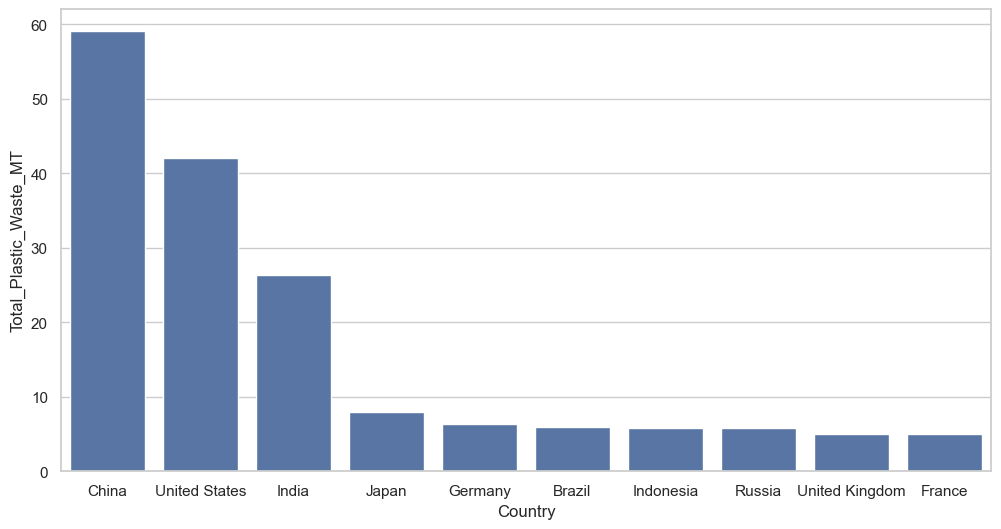

In [53]:
# Top 10 countries by plastic waste generation
top_10_countries = df.nlargest(10, 'Total_Plastic_Waste_MT')

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total_Plastic_Waste_MT', data=top_10_countries)
plt.title('Top 10 Countries by Plastic Waste Generation in 2023')
plt.xlabel('Country')
plt.ylabel('Plastic Waste (in tons)')
plt.xticks(rotation=45)
plt.show()

In [63]:
# Bar chart of recycling rate by country
plt.figure(figsize=(12, 8))
sns.barplot(data=df.sort_values(by='Recycling_Rate', ascending=False).head(10),
            x='Recycling_Rate', y='Country', palette='magma')
plt.title('Top 10 Countries by Recycling Rate (%)')
plt.xlabel('Recycling Rate (%)')
plt.ylabel('Country')
plt.show()

AttributeError: 'str' object has no attribute 'figure'

TypeError: 'str' object is not callable

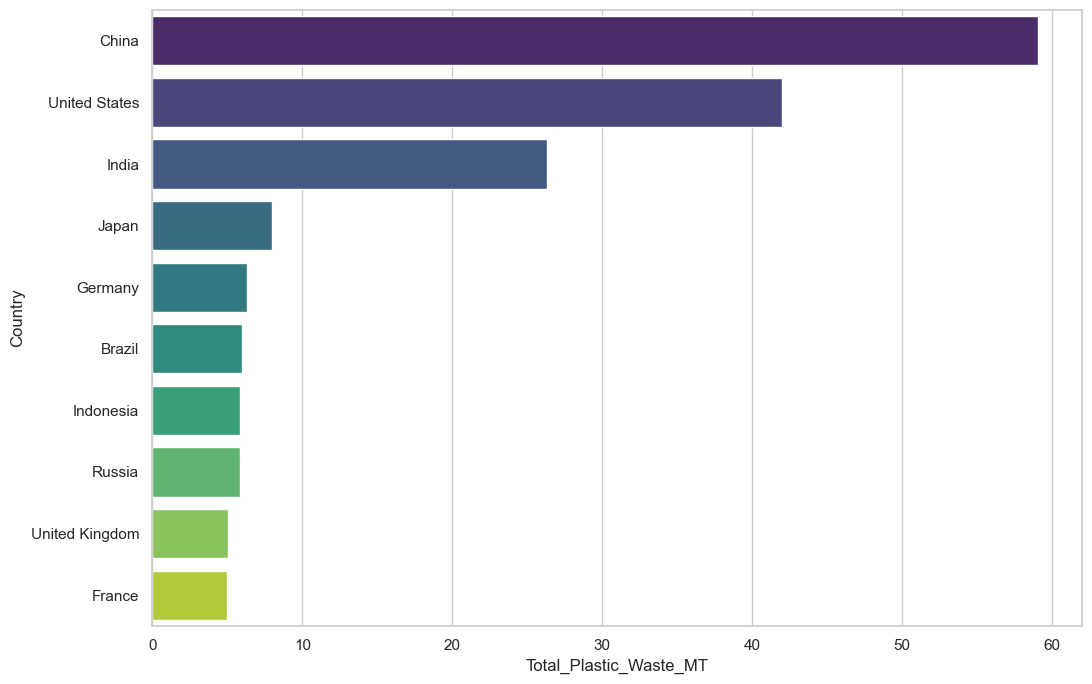

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=df.sort_values(by='Total_Plastic_Waste_MT', ascending=False).head(10),
            x='Total_Plastic_Waste_MT', y='Country', palette='viridis')
plt.title('Top 10 Countries by Total Plastic Waste (MT)')
plt.xlabel('Total Plastic Waste (Metric Tons)')
plt.ylabel('Country')
plt.show()

TypeError: 'str' object is not callable

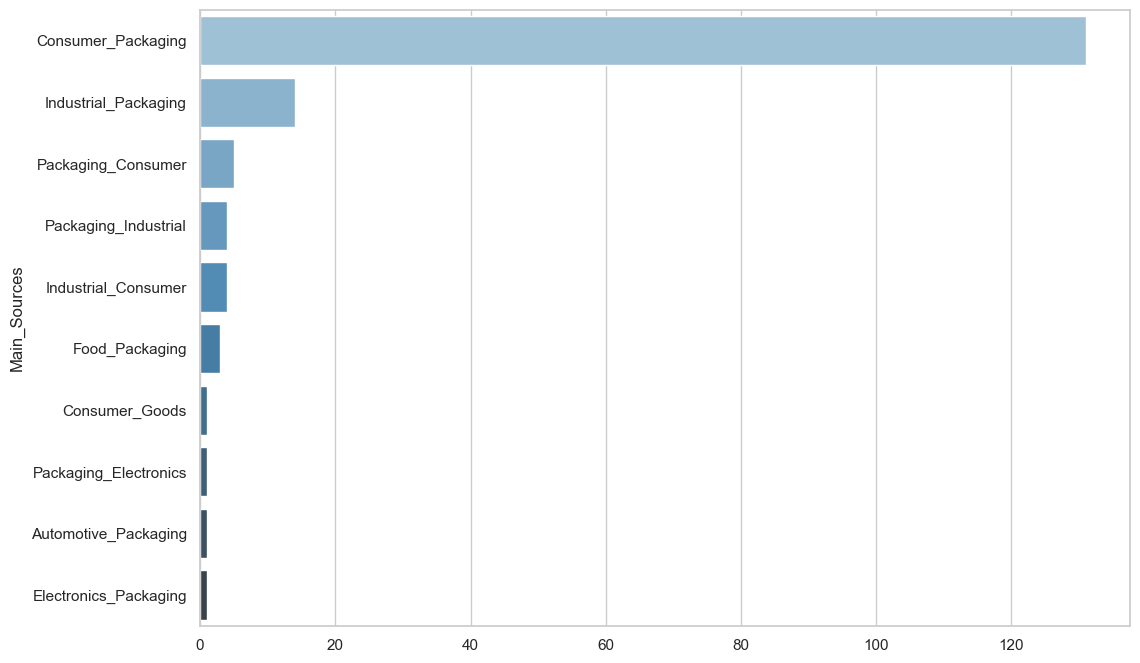

In [67]:
# Count the occurrences of each main source of plastic waste
source_counts = df['Main_Sources'].value_counts()

# Bar chart of main sources
plt.figure(figsize=(12, 8))
sns.barplot(x=source_counts.values, y=source_counts.index, palette='Blues_d')
plt.title('Main Sources of Plastic Waste')
plt.xlabel('Number of Countries')
plt.ylabel('Main Source')
plt.show()

TypeError: 'str' object is not callable

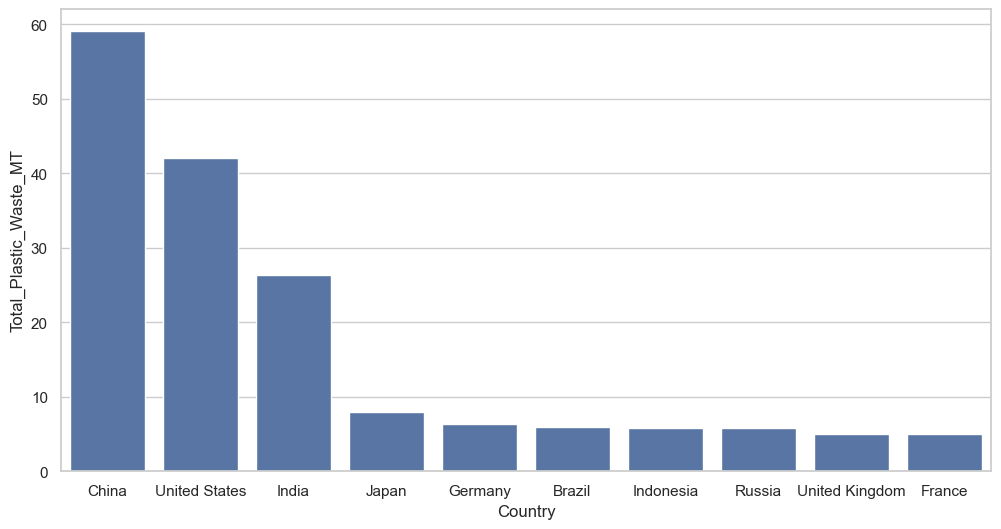

In [69]:
# Top 10 countries by plastic waste generation
top_10_countries = df.nlargest(10, 'Total_Plastic_Waste_MT')

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total_Plastic_Waste_MT', data=top_10_countries)
plt.title('Top 10 Countries by Plastic Waste Generation in 2023')
plt.xlabel('Country')
plt.ylabel('Plastic Waste (in tons)')
plt.xticks(rotation=45)
plt.show()

TypeError: 'str' object is not callable

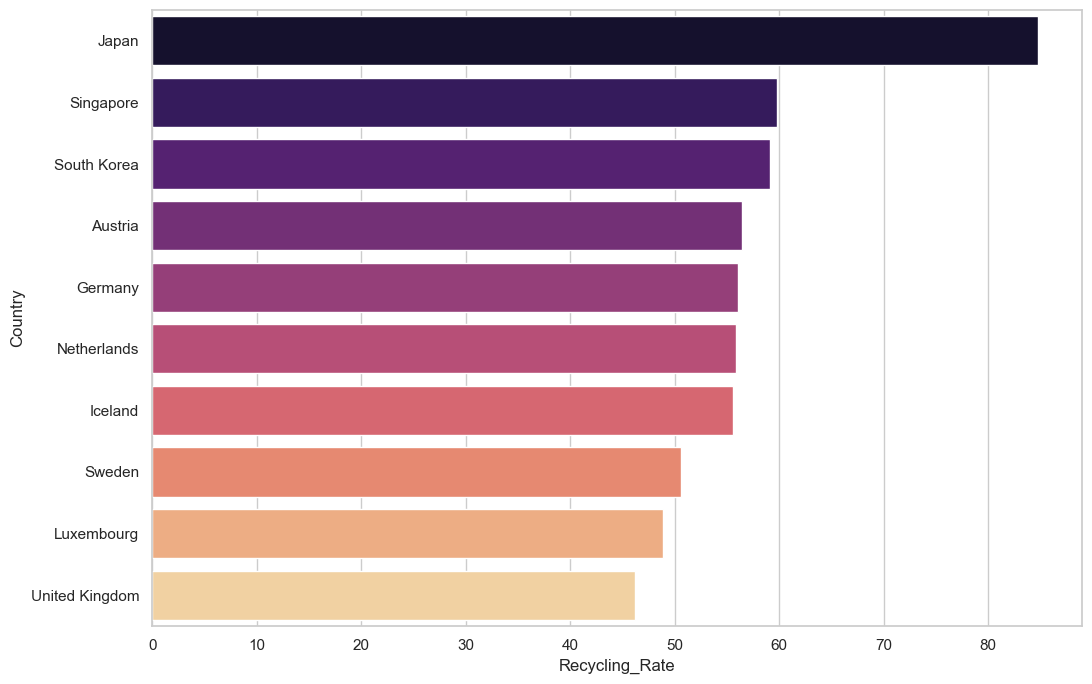

In [71]:
# Bar chart of recycling rate by country
plt.figure(figsize=(12, 8))
sns.barplot(data=df.sort_values(by='Recycling_Rate', ascending=False).head(10),
            x='Recycling_Rate', y='Country', palette='magma')
plt.title('Top 10 Countries by Recycling Rate (%)')
plt.xlabel('Recycling Rate (%)')
plt.ylabel('Country')
plt.show()

Numeric DataFrame Columns:
 Index(['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG',
       'Coastal_Waste_Risk'],
      dtype='object')


TypeError: 'str' object is not callable

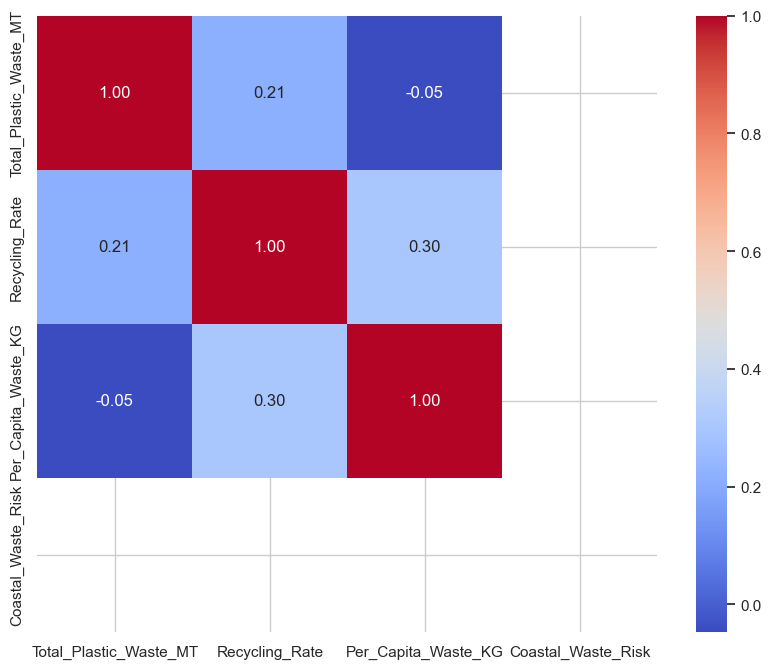

In [73]:
# Correlation heatmap

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Check for any remaining non-numeric columns
print("Numeric DataFrame Columns:\n", numeric_df.columns)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [77]:
pip install geopandas

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [28 lines of output]
      Traceback (most recent call last):
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 149, in prepare_metadata_for_build_wheel
          return hook(metadata_directory, config_settings)
                 ^^^^^^^^^^^^^^^^^^^^

TypeError: 'str' object is not callable

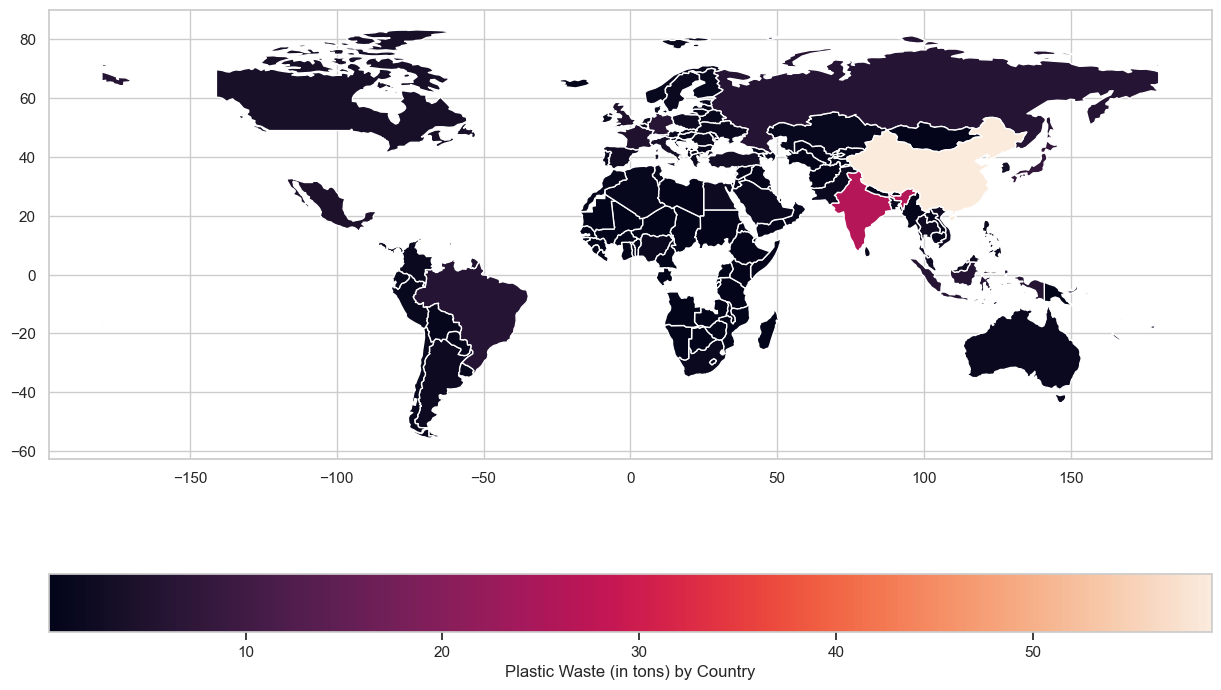

In [83]:
# Geospatial visualization example (using plotly or geopandas)
# If you have latitude and longitude, you can create a map.
import geopandas as gpd

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the plastic waste data with the world map
merged = world.set_index('name').join(df.set_index('Country'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Total_Plastic_Waste_MT', ax=ax, legend=True,
            legend_kwds={'label': "Plastic Waste (in tons) by Country",
                         'orientation': "horizontal"})
plt.title('Global Plastic Waste Generation 2023')
plt.show()

In [85]:
# Identify best performing countries (high recycling rate, low total plastic waste)
best_performers = df[(df['Recycling_Rate'] > 50) & (df['Total_Plastic_Waste_MT'] < df['Total_Plastic_Waste_MT'].mean())]
print("Best Performing Countries (High Recycling Rate, Low Total Plastic Waste):")
print(best_performers[['Country', 'Total_Plastic_Waste_MT', 'Recycling_Rate']])

Best Performing Countries (High Recycling Rate, Low Total Plastic Waste):
      Country  Total_Plastic_Waste_MT  Recycling_Rate
32     Sweden                    1.51            50.6
33    Austria                    1.48            56.4
44  Singapore                    1.27            59.8
79    Iceland                    0.57            55.6


In [87]:
# Key Findings
print("Countries with the highest plastic waste generation:")
print(top_10_countries[['Country', 'Total_Plastic_Waste_MT']])

Countries with the highest plastic waste generation:
          Country  Total_Plastic_Waste_MT
0           China                   59.08
1   United States                   42.02
2           India                   26.33
3           Japan                    7.99
4         Germany                    6.28
5          Brazil                    5.96
6       Indonesia                    5.85
7          Russia                    5.84
8  United Kingdom                    5.03
9          France                    4.98


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/prosenjeetsaha/Desktop/Code-2025/Plastic Waste Around the World.csv")
df.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB


TypeError: 'str' object is not callable

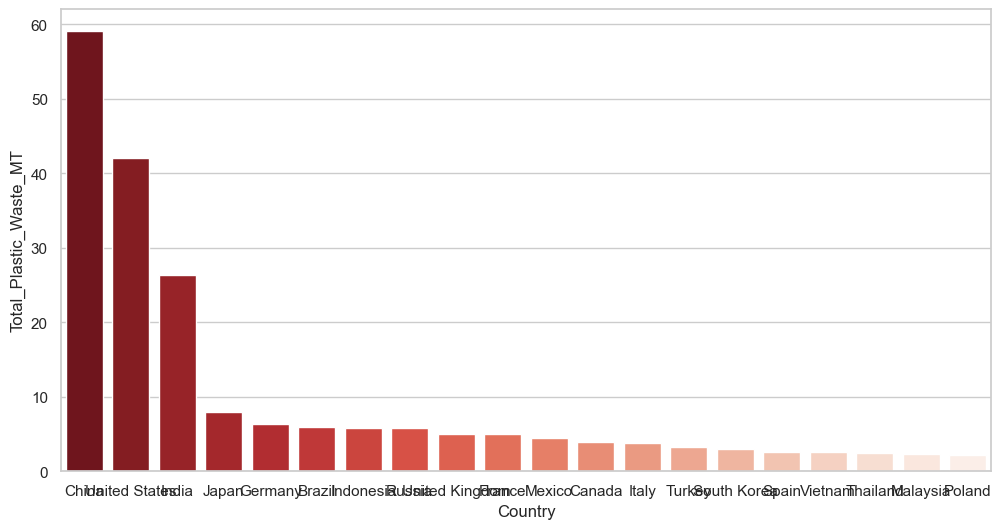

In [93]:
#Top 20 Countries by TPW in Milion Tons
top_20 = df.nlargest(20, 'Total_Plastic_Waste_MT')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x='Country', y='Total_Plastic_Waste_MT', palette='Reds_r')

plt.title('Top 20 Countries by Total Plastic Waste (in Million Tons)')
plt.xlabel('Country')
plt.ylabel('Total Plastic Waste (MT)')
plt.xticks(rotation=90)
plt.show()

TypeError: 'str' object is not callable

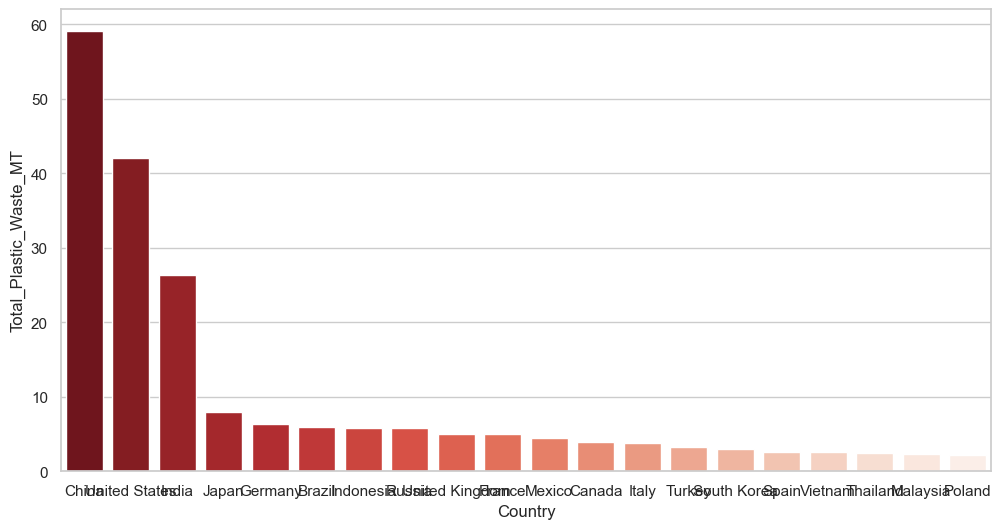

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the column is numeric
df['Total_Plastic_Waste_MT'] = pd.to_numeric(df['Total_Plastic_Waste_MT'], errors='coerce')

# Select the top 20 countries
top_20 = df.nlargest(20, 'Total_Plastic_Waste_MT')

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x='Country', y='Total_Plastic_Waste_MT', palette='Reds_r')

# Add titles and labels
plt.title('Top 20 Countries by Total Plastic Waste (in Million Tons)')
plt.xlabel('Country')
plt.ylabel('Total Plastic Waste (MT)')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout for better display
plt.show()

TypeError: 'str' object is not callable

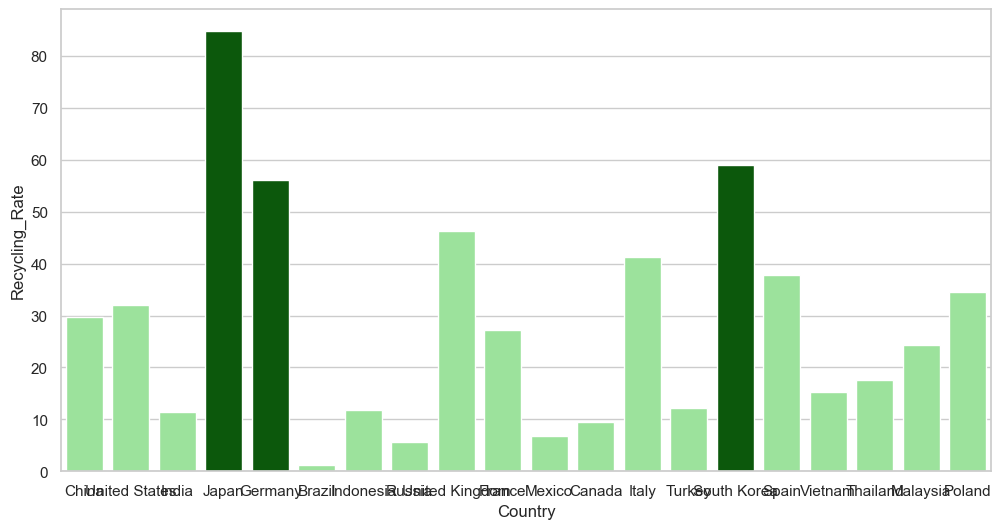

In [97]:
#Recycling Rate of Countries
colors = ['lightgreen' if rate <= 50 else 'darkgreen' for rate in top_20['Recycling_Rate']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x='Country', y='Recycling_Rate', palette=colors)

plt.title('Recycling Rate by Country (Top 20')
plt.xlabel('Country')
plt.ylabel('Recycling Rate (%)')
plt.xticks(rotation=90)
plt.show()

TypeError: 'str' object is not callable

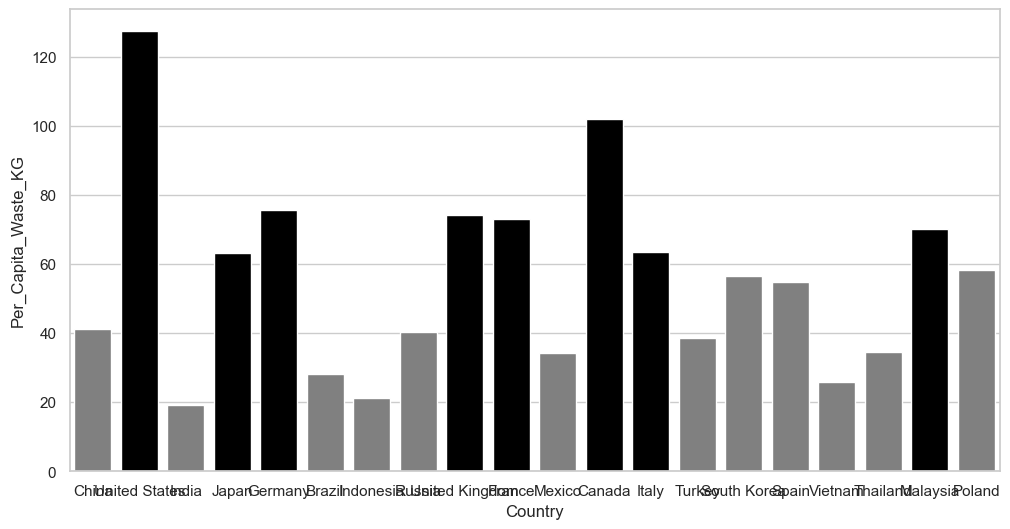

In [99]:
#Per Capita Plastic Waste by Countries
colors = ['grey' if waste < 60 else 'black' for waste in top_20['Per_Capita_Waste_KG']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x='Country', y='Per_Capita_Waste_KG', palette=colors)

plt.title('Per Capita Plastic Waste by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Per Capita Waste (KG)')
plt.xticks(rotation=90)
plt.show()

TypeError: 'str' object is not callable

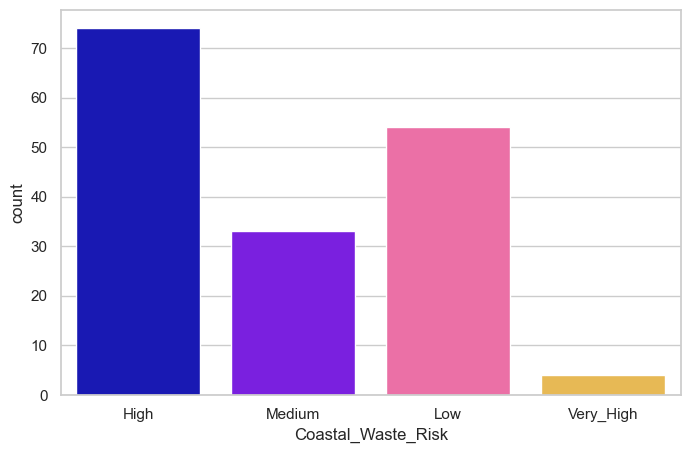

In [101]:
#Coastal Waste Risk across Countries
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Coastal_Waste_Risk', palette='gnuplot2')

# Labeling
plt.title('Coastal Waste Risk Level across Countries')
plt.xlabel('Coastal Waste Risk')
plt.ylabel('Number of Countries')
plt.show()

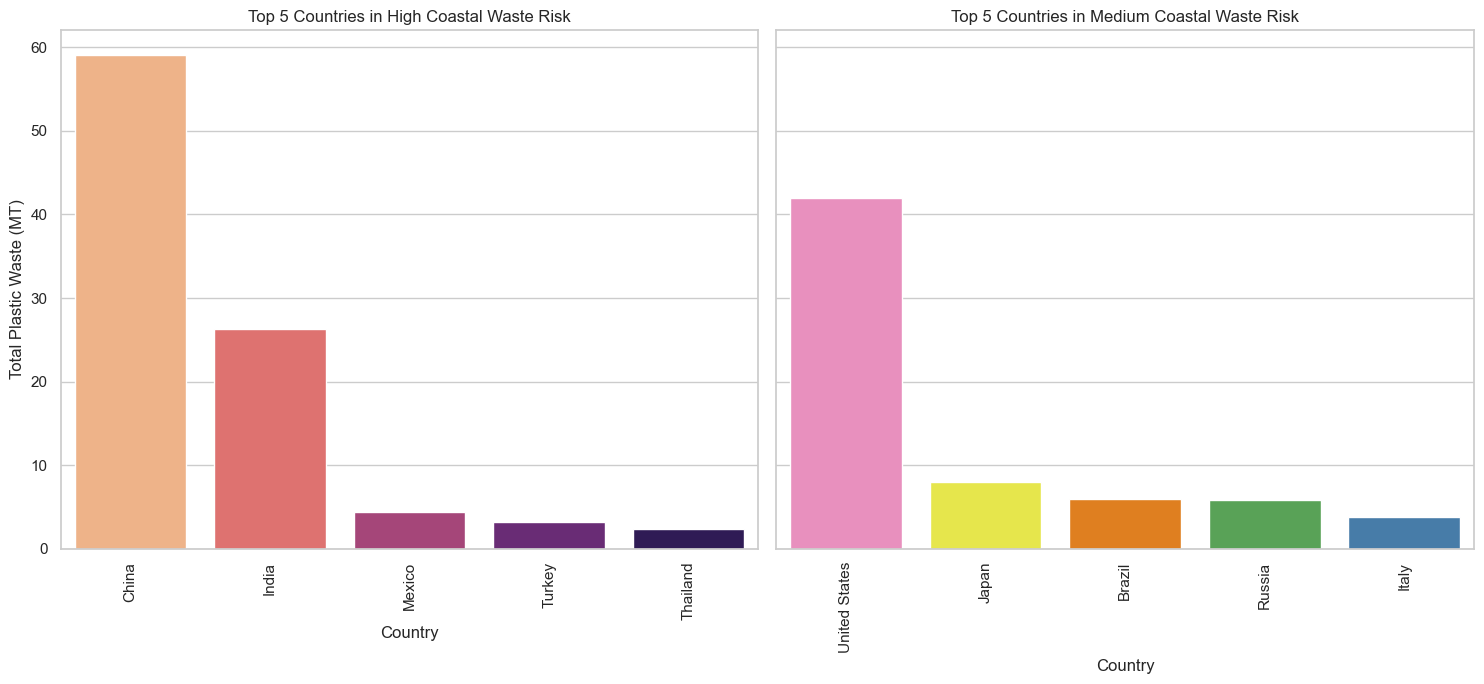

In [103]:
#Top 5 countries with High Coastal Risk and Medium Coastal Risk
top_5_high_risk = df[df['Coastal_Waste_Risk'] == 'High'].nlargest(5, 'Total_Plastic_Waste_MT')
top_5_medium_risk = df[df['Coastal_Waste_Risk'] == 'Medium'].nlargest(5, 'Total_Plastic_Waste_MT')

fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# High Risk
sns.barplot(data=top_5_high_risk, x='Country', y='Total_Plastic_Waste_MT', palette='magma_r', ax=axes[0])
axes[0].set_title('Top 5 Countries in High Coastal Waste Risk')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Plastic Waste (MT)')
axes[0].tick_params(axis='x', rotation=90)

# Medium Risk
sns.barplot(data=top_5_medium_risk, x='Country', y='Total_Plastic_Waste_MT', palette='Set1_r', ax=axes[1])
axes[1].set_title('Top 5 Countries in Medium Coastal Waste Risk')
axes[1].set_xlabel('Country')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

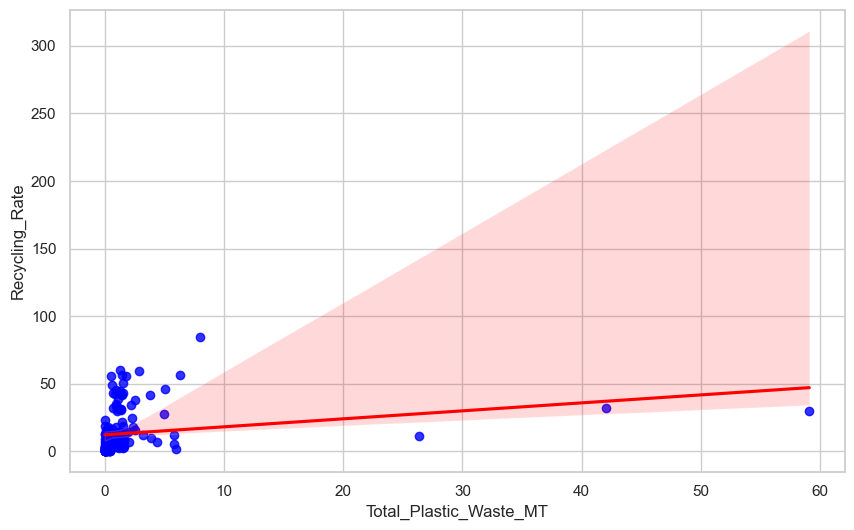

In [105]:
#Relationship between Total Plastic Waste and Recycling Rate
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Total_Plastic_Waste_MT', y='Recycling_Rate', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Relationship between Total Plastic Waste and Recycling Rate')
plt.xlabel('Total Plastic Waste (MT)')
plt.ylabel('Recycling Rate (%)')
plt.show()

TypeError: 'str' object is not callable

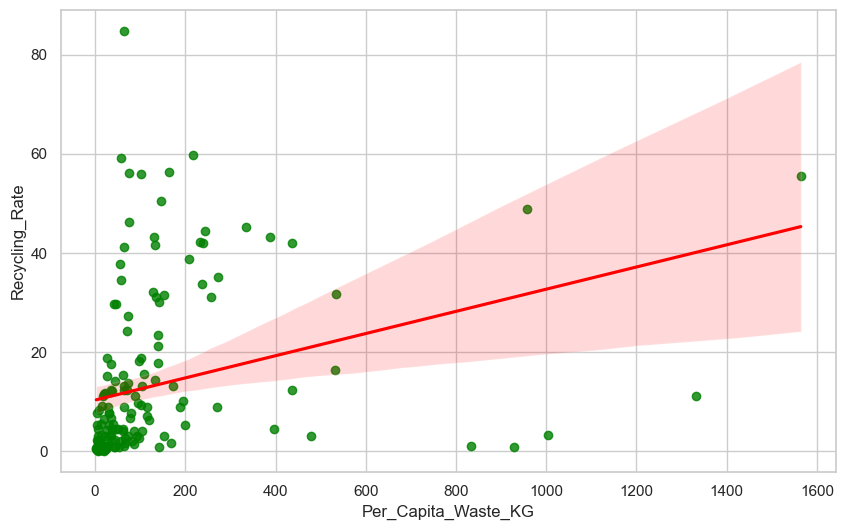

In [107]:
#Relationship between Per Capita Plastic and Recycling Rate
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Per_Capita_Waste_KG', y='Recycling_Rate', scatter_kws={'color': 'green'}, line_kws={'color': 'red'})

plt.title('Relationship between Per Capita Plastic Waste and Recycling Rate')
plt.xlabel('Per Capita Waste (KG)')
plt.ylabel('Recycling Rate (%)')
plt.show()

TypeError: 'str' object is not callable

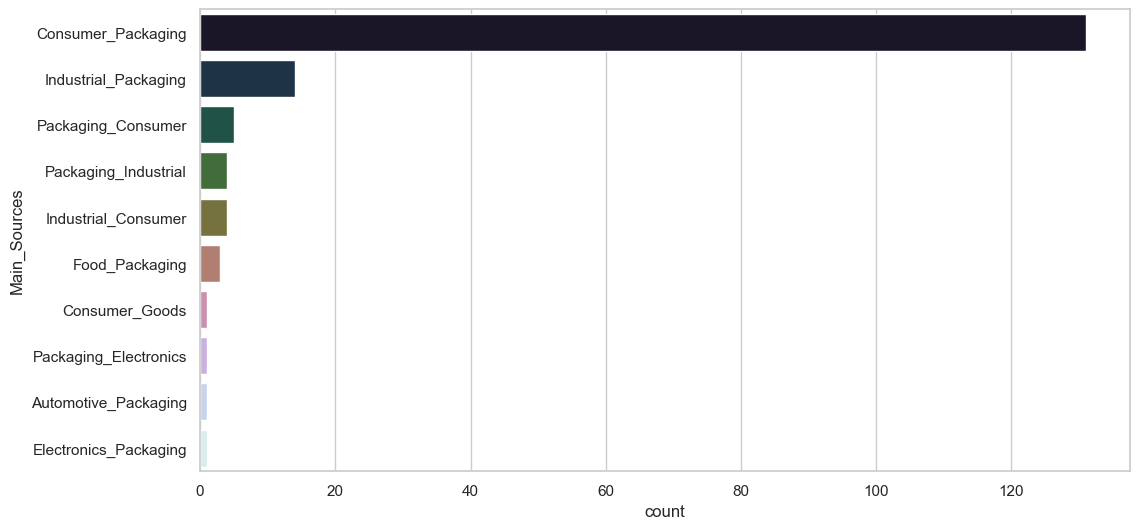

In [109]:
#Main Source of Plastic Waste
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Main_Sources', order=df['Main_Sources'].value_counts().index, palette='cubehelix')

plt.title('Distribution of Main Sources of Plastic Waste')
plt.xlabel('Number of Countries')
plt.ylabel('Main Sources')
plt.show()

TypeError: 'str' object is not callable

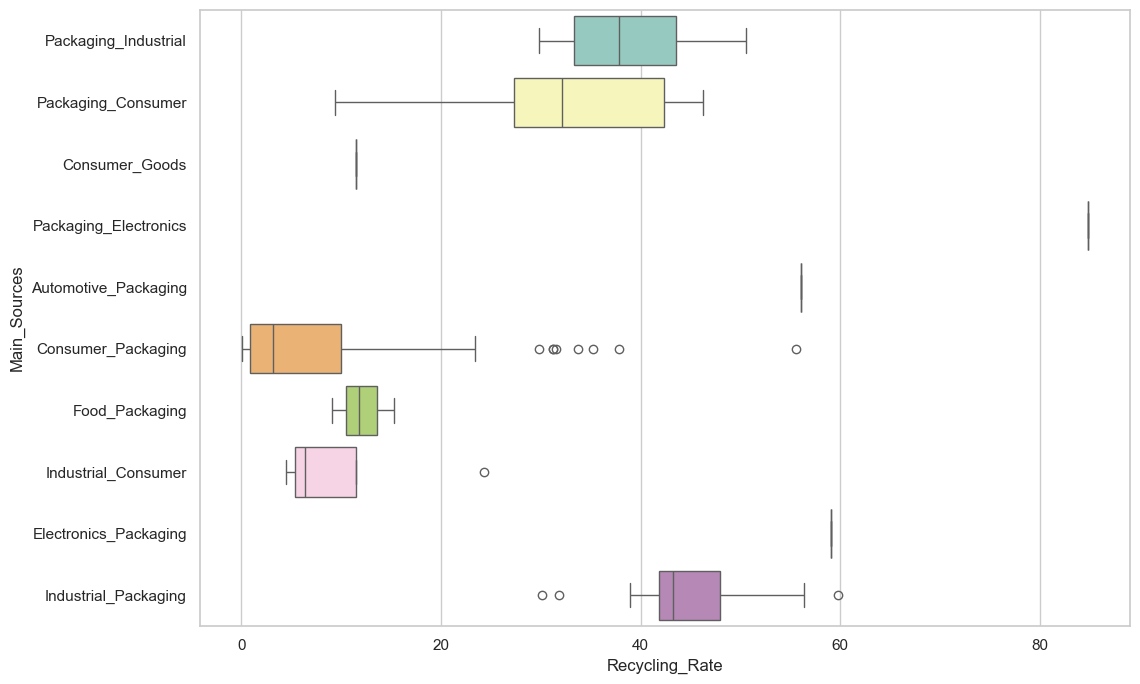

In [111]:
#Recycling Rate by Main source of Pastic Waste
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Recycling_Rate', y='Main_Sources', palette='Set3')

plt.title('Recycling Rate by Main Sources of Plastic Waste')
plt.xlabel('Recycling Rate (%)')
plt.ylabel('Main Sources')
plt.show()

TypeError: 'str' object is not callable

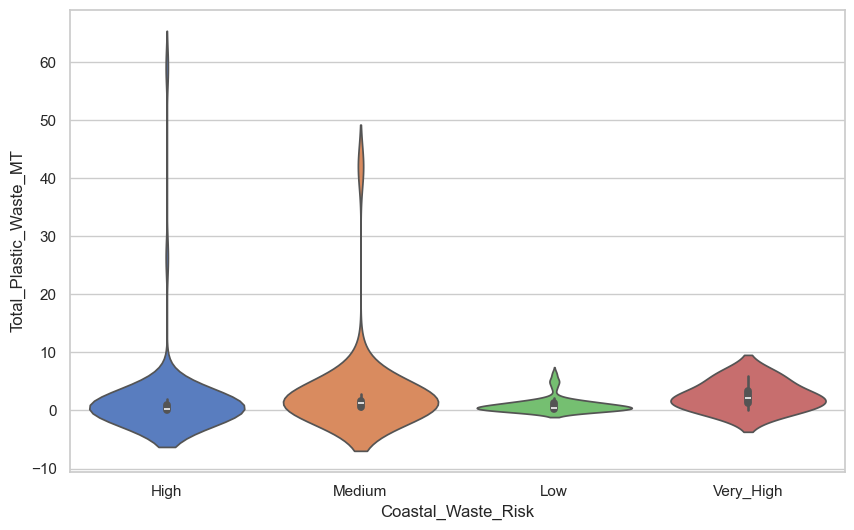

In [113]:
#Distribution of Total Plastic Waste by Coastal Waste Risk
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Coastal_Waste_Risk', y='Total_Plastic_Waste_MT', palette='muted')

plt.title('Distribution of Total Plastic Waste by Coastal Waste Risk')
plt.xlabel('Coastal Waste Risk')
plt.ylabel('Total Plastic Waste (MT)')
plt.show()

TypeError: 'str' object is not callable

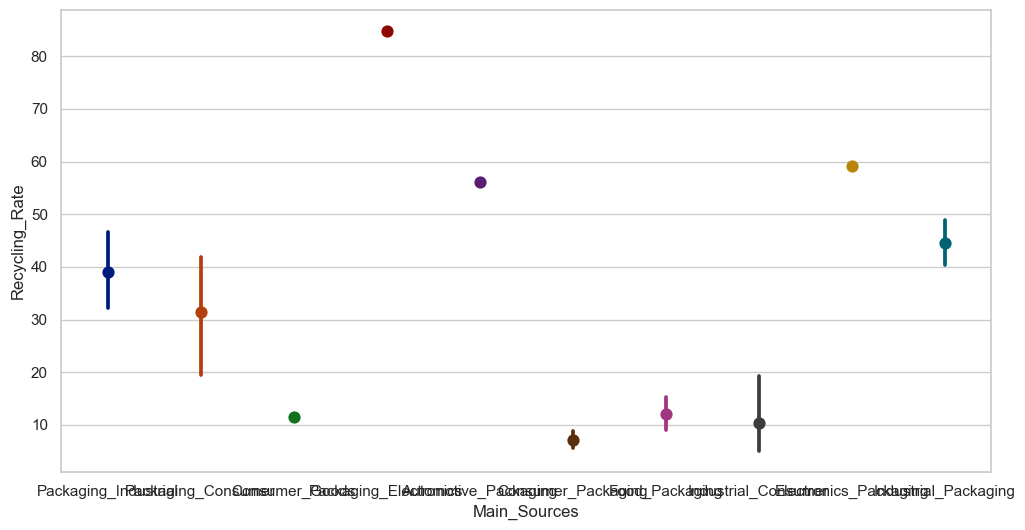

In [115]:
#Avg Recycling Rate by Main Source of Plastic Waste
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='Main_Sources', y='Recycling_Rate', estimator='mean', palette='dark')

plt.title('Average Recycling Rate by Main Sources of Plastic Waste')
plt.xlabel('Main Sources')
plt.ylabel('Average Recycling Rate (%)')
plt.xticks(rotation=90)
plt.show()

In [117]:
# top 10 per waste production 
df.sort_values(by='Total_Plastic_Waste_MT', ascending=False).head(10)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low
5,Brazil,5.96,Consumer_Packaging,1.2,28.1,Medium
6,Indonesia,5.85,Food_Packaging,11.8,21.3,Very_High
7,Russia,5.84,Industrial_Consumer,5.6,40.2,Medium
8,United Kingdom,5.03,Packaging_Consumer,46.2,74.3,Low
9,France,4.98,Packaging_Consumer,27.3,73.1,Low


In [119]:
# top 3 as percentage of total waste poduciton
total_waste = df['Total_Plastic_Waste_MT'].sum()
top_3_waste_producers = df.sort_values(by='Total_Plastic_Waste_MT', ascending=False).head(3)
top_3_percentage = (top_3_waste_producers['Total_Plastic_Waste_MT'].sum() / total_waste) * 100
print(f"Top 3 waste producers contribute {top_3_percentage:.0f}% of total waste.")

Top 3 waste producers contribute 45% of total waste.


TypeError: 'str' object is not callable

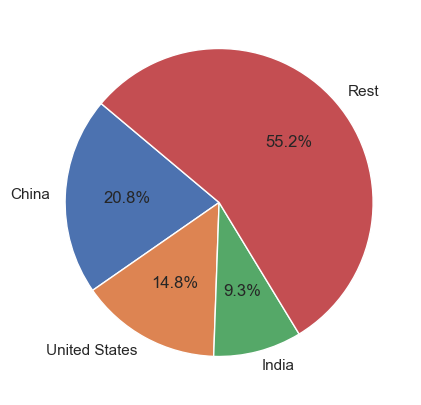

In [121]:
# pie chart (top 3 as percentage of total waste poduciton)

# Calculate total waste
total_waste = df['Total_Plastic_Waste_MT'].sum()
# Get top 3 waste producers
top_3 = df.sort_values(by='Total_Plastic_Waste_MT', ascending=False).head(3)
top_3_sum = top_3['Total_Plastic_Waste_MT'].sum()
# Calculate cumulative waste for the rest
rest_sum = total_waste - top_3_sum
# Prepare data for pie chart
labels = list(top_3['Country']) + ['Rest']
sizes = list(top_3['Total_Plastic_Waste_MT']) + [rest_sum]

# Plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Top 3 Waste Producers vs. Cumulative Rest")
plt.show()

In [123]:
# top 5 countries per recycling
df.sort_values(by='Recycling_Rate', ascending=False).head(5)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
44,Singapore,1.27,Industrial_Packaging,59.8,217.9,Medium
14,South Korea,2.91,Electronics_Packaging,59.1,56.7,Medium
33,Austria,1.48,Industrial_Packaging,56.4,164.8,Low
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [125]:
# top 5 for per capita waste
df.sort_values(by='Per_Capita_Waste_KG', ascending=False).head(5)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
79,Iceland,0.57,Consumer_Packaging,55.6,1564.4,Low
78,Malta,0.59,Consumer_Packaging,11.2,1331.5,Medium
76,Montenegro,0.63,Consumer_Packaging,3.4,1004.8,Medium
77,Luxembourg,0.61,Industrial_Packaging,48.9,957.8,Low
164,Nauru,0.01,Consumer_Packaging,0.9,927.8,High


TypeError: 'str' object is not callable

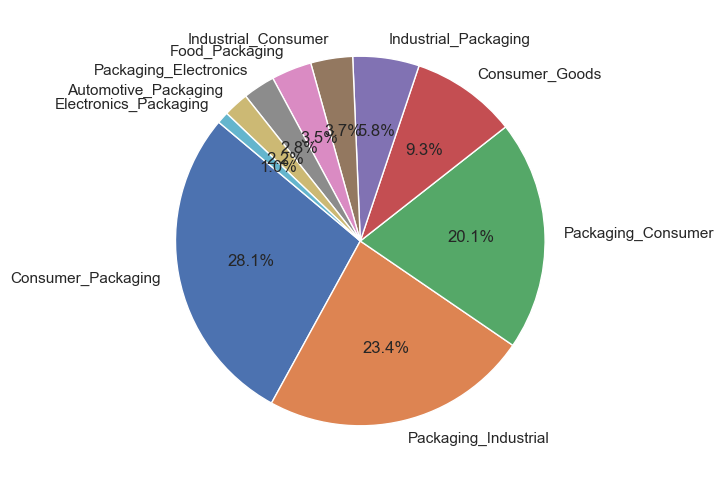

In [127]:
# waste per type

# Calculate cumulative waste for each waste type and sort in descending order
waste_by_type = df.groupby('Main_Sources')['Total_Plastic_Waste_MT'].sum().sort_values(ascending=False)
# Plot ordered pie chart for cumulative waste by type
plt.figure(figsize=(8, 6))
plt.pie(waste_by_type, labels=waste_by_type.index, autopct='%1.1f%%', startangle=140)
plt.title("Plastic Waste by Type in MT")
plt.show()

TypeError: 'str' object is not callable

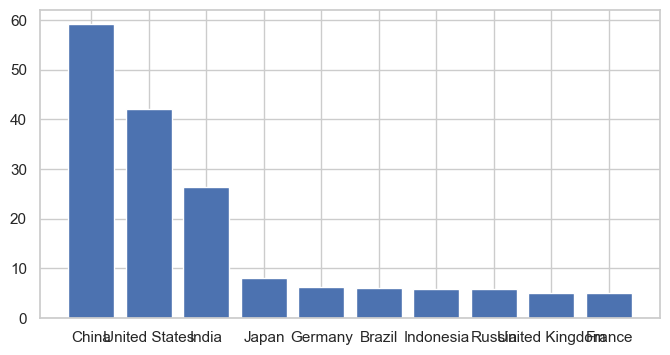

In [129]:
# Top 10 countries by plastic waste bar chart
plt.figure(figsize=(8, 4))
plt.bar(df['Country'].head(10), df['Total_Plastic_Waste_MT'].head(10))
plt.xlabel('Country')
plt.ylabel('Total Plastic Waste (MT)')
plt.title('Top 10 Countries by Total Plastic Waste')
plt.xticks(rotation=45)
plt.show()

TypeError: 'str' object is not callable

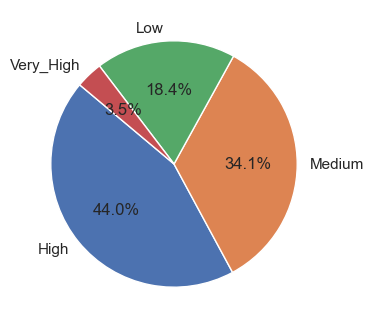

In [131]:
# Calculate cumulative waste for each Coastal Waste Risk category and sort by descending order
cumulative_waste = df.groupby('Coastal_Waste_Risk')['Total_Plastic_Waste_MT'].sum()
cumulative_waste_sorted = cumulative_waste.sort_values(ascending=False)

# Creating an ordered pie chart
plt.figure(figsize=(4, 4))
plt.pie(cumulative_waste_sorted, labels=cumulative_waste_sorted.index, autopct='%1.1f%%', startangle=140)
plt.title('Plastic Waste by Coastal Waste Risk')
plt.show()

In [135]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [139]:
# add population with scraper
# relationship of per country vaste and recycling rate(line vs dot chart)

/var/folders/4p/c34kjspx0053g43j2_b5w2z40000gn/T/ipykernel_8499/1415367532.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_top20["Country"], rotation=45, ha='right')


TypeError: 'str' object is not callable

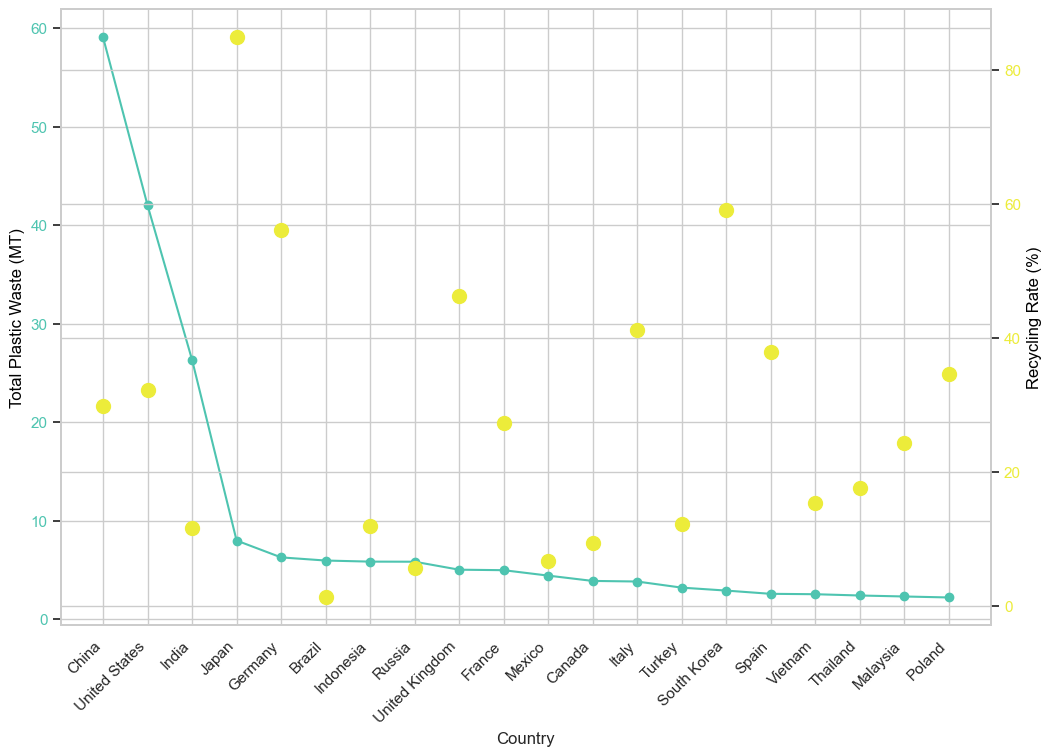

In [141]:
# Sort DataFrame by Total Plastic Waste in descending order and select top 20

c1 = '#4EC4B0'
c2 = '#ECEC3A'
lable = '#000000'

df_top20 = df.sort_values(by="Total_Plastic_Waste_MT", ascending=False).head(20)

# Sort DataFrame by Total Plastic Waste in descending order and select top 20
df_top20 = df.sort_values(by="Total_Plastic_Waste_MT", ascending=False).head(20)

# Define custom colors
c1 = '#4EC4B0'  # Teal color
c2 = '#ECEC3A'  # Yellow color

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Total Plastic Waste as a line plot
ax1.plot(df_top20["Country"], df_top20["Total_Plastic_Waste_MT"], marker='o', color=c1, label='Total Plastic Waste (MT)')
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Plastic Waste (MT)', color=lable)
ax1.tick_params(axis='y', labelcolor=c1)
ax1.set_xticklabels(df_top20["Country"], rotation=45, ha='right')

# Create a second y-axis for Recycling Rate
ax2 = ax1.twinx()
ax2.scatter(df_top20["Country"], df_top20["Recycling_Rate"], color=c2, label='Recycling Rate (%)', s=100)
ax2.set_ylabel('Recycling Rate (%)', color=lable)
ax2.tick_params(axis='y', labelcolor=c2)

# Add title and legends
plt.title('Waste vs Recycling')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

# Show plot
plt.show()

In [143]:
# correct for geopandas
corrections = {
    'United States': 'United States of America',
    'South Korea': 'Republic of Korea',
    'Czech Republic': 'Czechia',
    'Ivory Coast': 'Côte d\'Ivoire',
    'Democratic Republic of Congo': 'Democratic Republic of the Congo',
    'Republic of Congo': 'Congo',
    'Russia': 'Russia',
    'Syria': 'Syria',
    'Bolivia': 'Bolivia',
    'Laos': 'Lao People\'s Democratic Republic',
    'Brunei': 'Brunei Darussalam',
    'Cape Verde': 'Cabo Verde',
    'East Timor': 'Timor-Leste',
    'Myanmar': 'Myanmar',
    'Eswatini': 'Swaziland',
    'Tanzania': 'United Republic of Tanzania',
    'Libya': 'Libyan Arab Jamahiriya',
    'Iran': 'Iran (Islamic Republic of)',
    'Venezuela': 'Venezuela (Bolivarian Republic of)',
    'Palestine': 'Palestine, State of',
    'North Macedonia': 'North Macedonia',
}

# Apply the correction dictionary to the 'name' column in your DataFrame
df['name'] = df['Country'].replace(corrections)

TypeError: 'str' object is not callable

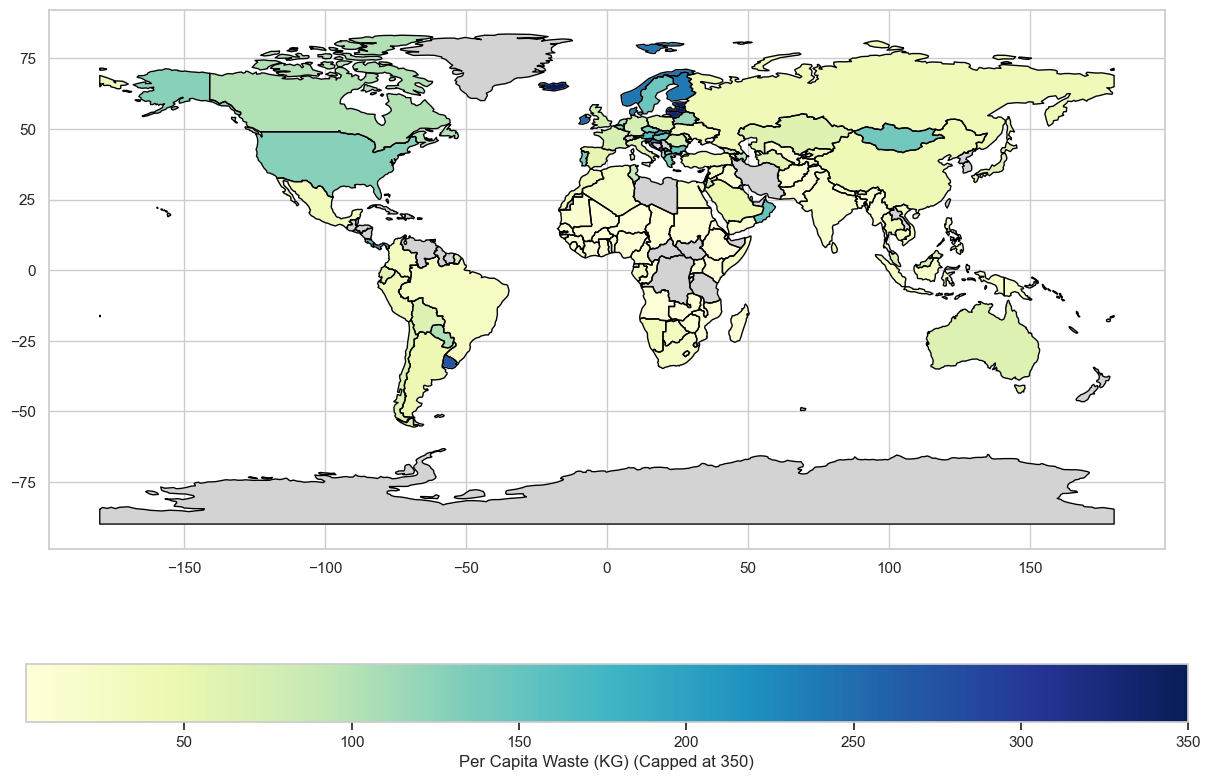

In [145]:
# Set seaborn style for consistency
sns.set(style="whitegrid")

# Load world shapefile from geopandas and merge with adjusted DataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Cap the Per Capita Waste values at 350 kg
df['Adjusted_Per_Capita_Waste_KG'] = df['Per_Capita_Waste_KG'].clip(upper=350)

# Merge world map with the adjusted data on country name
world = world.merge(df, how="left", on="name")

# Plotting the per capita waste as a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color="black")  # Outline of countries
world.plot(column="Adjusted_Per_Capita_Waste_KG", ax=ax, legend=True,
           legend_kwds={'label': "Per Capita Waste (KG) (Capped at 350)",
                        'orientation': "horizontal"},
           cmap="YlGnBu",  # Color map for visualizing waste per capita
           missing_kwds={"color": "lightgrey", "label": "No data"})  # Grey for missing data

# Title and style adjustments
plt.title('World Distribution of Per Capita Plastic Waste (Capped at 350 KG)', fontsize=16, weight='bold')
plt.axis('off')  # Hide axis for a cleaner map
plt.show()

In [149]:
df['Main_Sources'].value_counts()

Main_Sources
Consumer_Packaging       131
Industrial_Packaging      14
Packaging_Consumer         5
Packaging_Industrial       4
Industrial_Consumer        4
Food_Packaging             3
Consumer_Goods             1
Packaging_Electronics      1
Automotive_Packaging       1
Electronics_Packaging      1
Name: count, dtype: int64

In [151]:
df['Coastal_Waste_Risk'].value_counts()

Coastal_Waste_Risk
High         74
Low          54
Medium       33
Very_High     4
Name: count, dtype: int64

In [153]:
df.describe()

,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG,Adjusted_Per_Capita_Waste_KG
count,165.000000,165.000000,165.000000,165.000000
mean,1.723515,13.096364,122.255152,90.303030
std,6.001944,16.687354,222.849695,100.876361
min,0.010000,0.100000,2.600000,2.600000
25%,0.120000,1.200000,17.300000,17.300000
50%,0.510000,5.400000,54.900000,54.900000
75%,1.330000,16.400000,127.500000,127.500000
max,59.080000,84.800000,1564.400000,350.000000


In [165]:
df['Waste_to_Recycling_Ratio'] = df['Recycling_Rate']/df['Total_Plastic_Waste_MT']
df.head()
Top_10_Efficient_Countries = df[['Country', 'Waste_to_Recycling_Ratio']].sort_values(by='Waste_to_Recycling_Ratio', axis=0, ascending=False).head(10)
Top_10_Efficient_Countries

,Country,Waste_to_Recycling_Ratio
110,Seychelles,1890.0
162,Palau,1230.0
155,New Caledonia,585.0
157,Samoa,450.0
158,Tonga,320.0
148,Bhutan,246.0
159,Kiribati,210.0
109,Mauritius,192.5
160,Marshall Islands,180.0
111,Cape Verde,170.0


In [167]:
Top_10_Unefficient_Countries = df[['Country', 'Waste_to_Recycling_Ratio']].sort_values(by='Waste_to_Recycling_Ratio', axis=0, ascending=True).head(10)
Top_10_Unefficient_Countries

,Country,Waste_to_Recycling_Ratio
5,Brazil,0.201342
91,Somalia,0.303030
2,India,0.436764
0,China,0.504401
86,Yemen,0.697674
1,United States,0.763922
7,Russia,0.958904
87,Syria,0.975610
124,Chad,1.111111
85,Afghanistan,1.111111


In [169]:
#Let's also create TOP 10 countries by Total_Plastic_Waste_MT(10 biggest, and 10 smallest).

Biggest_Total_Plastic_Waste_Producers = df[['Country', 'Total_Plastic_Waste_MT']].sort_values(by='Total_Plastic_Waste_MT', axis=0, ascending=False).head(10)
Biggest_Total_Plastic_Waste_Producers

,Country,Total_Plastic_Waste_MT
0,China,59.08
1,United States,42.02
2,India,26.33
3,Japan,7.99
4,Germany,6.28
5,Brazil,5.96
6,Indonesia,5.85
7,Russia,5.84
8,United Kingdom,5.03
9,France,4.98


In [171]:
Smallest_Total_Plastic_Waste_Producers = df[['Country', 'Total_Plastic_Waste_MT']].sort_values(by='Total_Plastic_Waste_MT', axis=0, ascending=True).head(10)
Smallest_Total_Plastic_Waste_Producers

,Country,Total_Plastic_Waste_MT
164,Nauru,0.01
110,Seychelles,0.01
112,Sao Tome and Principe,0.01
135,Western Sahara,0.01
157,Samoa,0.01
163,Tuvalu,0.01
159,Kiribati,0.01
158,Tonga,0.01
160,Marshall Islands,0.01
161,Micronesia,0.01


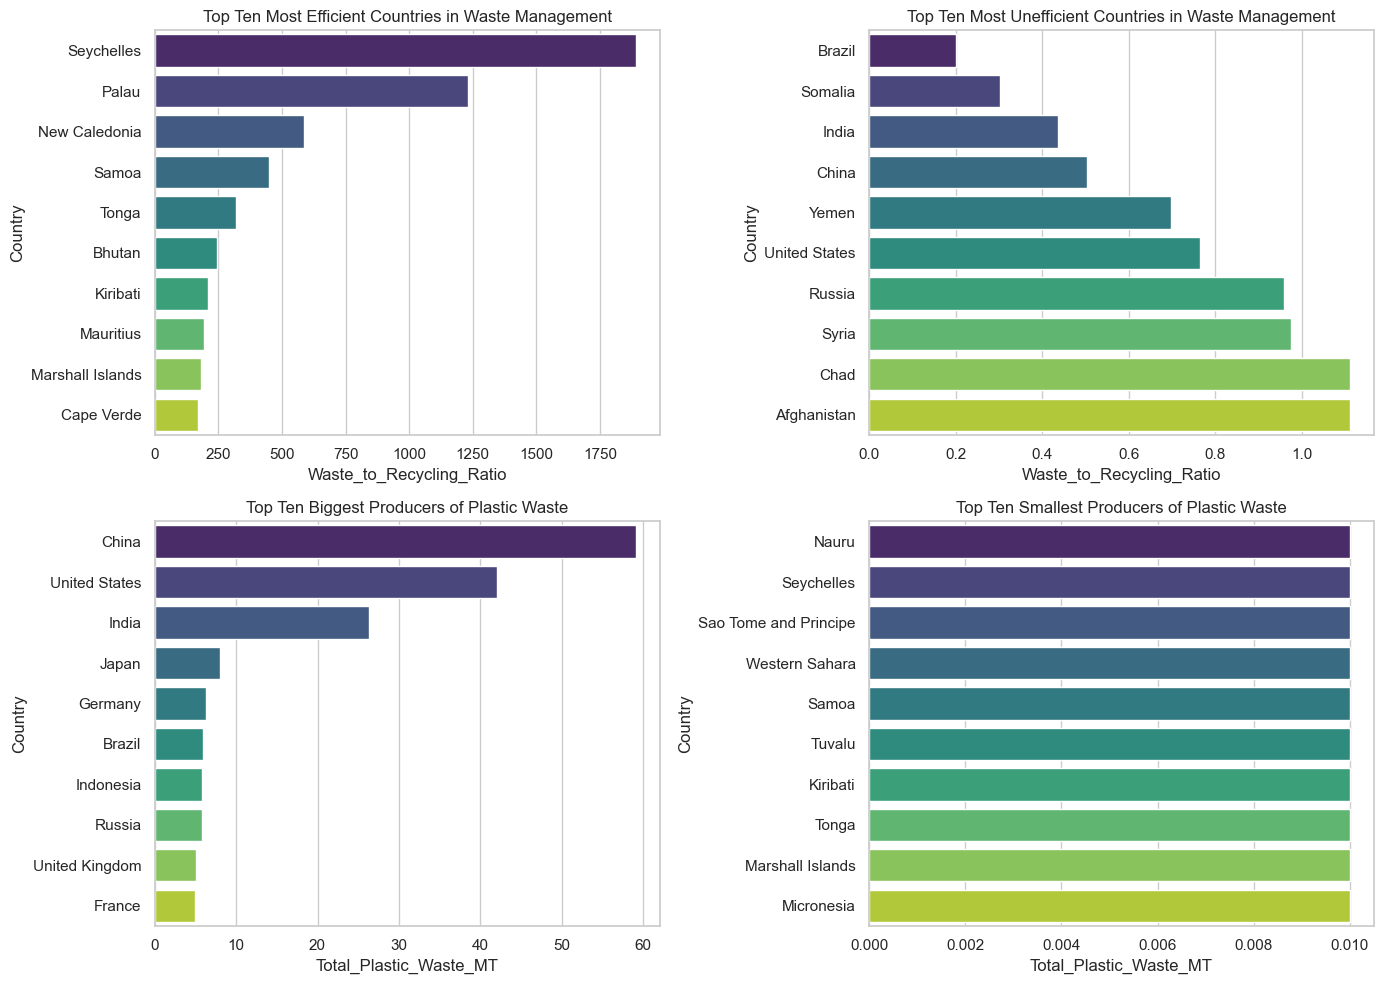

In [173]:
#visualization
sns.set(style='whitegrid')
fig, axes = plt.subplots(2,2,figsize=(14,10))

sns.barplot(data=Top_10_Efficient_Countries, x='Waste_to_Recycling_Ratio', y='Country', palette='viridis', ax=axes[0,0])
axes[0,0].set_title('Top Ten Most Efficient Countries in Waste Management')

sns.barplot(data=Top_10_Unefficient_Countries, x='Waste_to_Recycling_Ratio', y='Country', palette='viridis',ax=axes[0,1])
axes[0,1].set_title('Top Ten Most Unefficient Countries in Waste Management')

sns.barplot(data=Biggest_Total_Plastic_Waste_Producers, x='Total_Plastic_Waste_MT', y='Country', palette='viridis',ax=axes[1,0])
axes[1,0].set_title('Top Ten Biggest Producers of Plastic Waste')

sns.barplot(data=Smallest_Total_Plastic_Waste_Producers, x='Total_Plastic_Waste_MT', y='Country', palette='viridis',ax=axes[1,1])
axes[1,1].set_title('Top Ten Smallest Producers of Plastic Waste')

plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

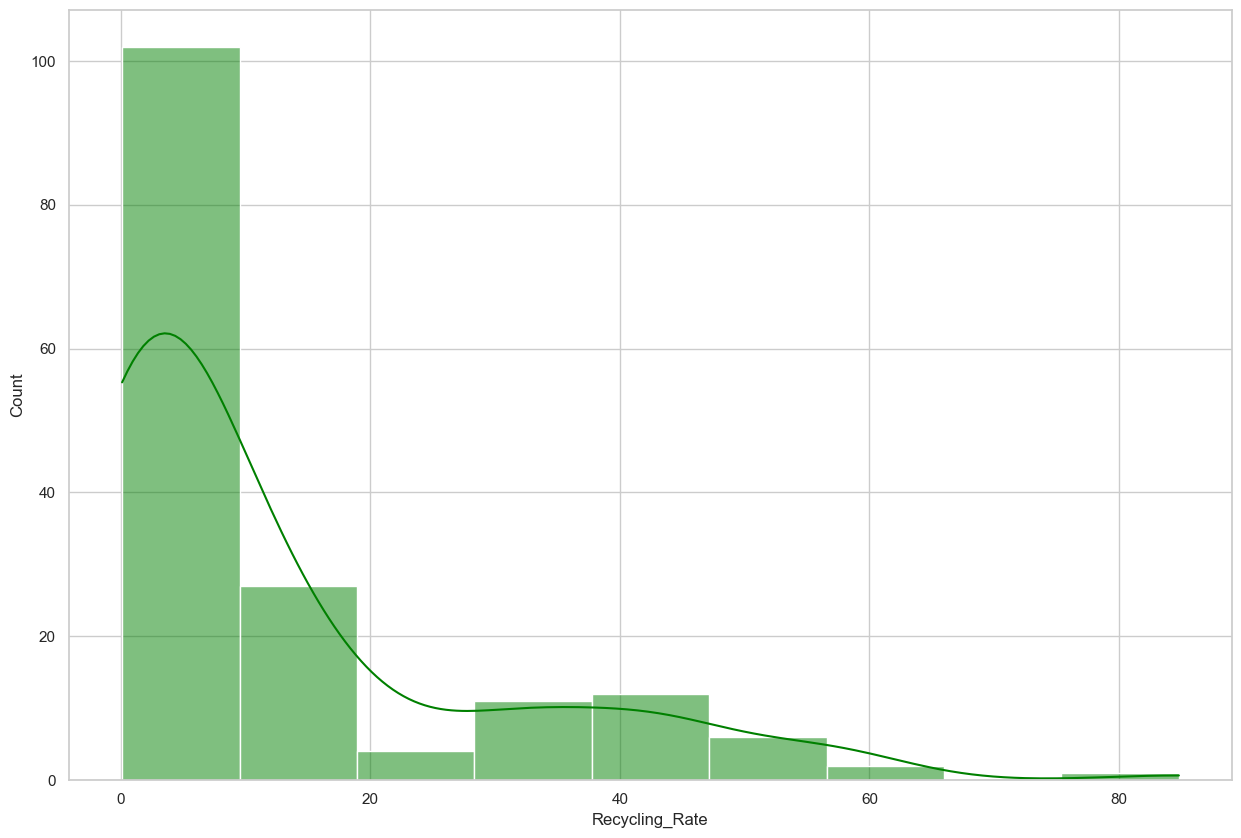

In [175]:
plt.figure(figsize = (15,10))
sns.histplot(data= df, x='Recycling_Rate', kde =  True,color = 'green', bins = 9)
plt.title("Distribution of Recycling rate ")

TypeError: 'str' object is not callable

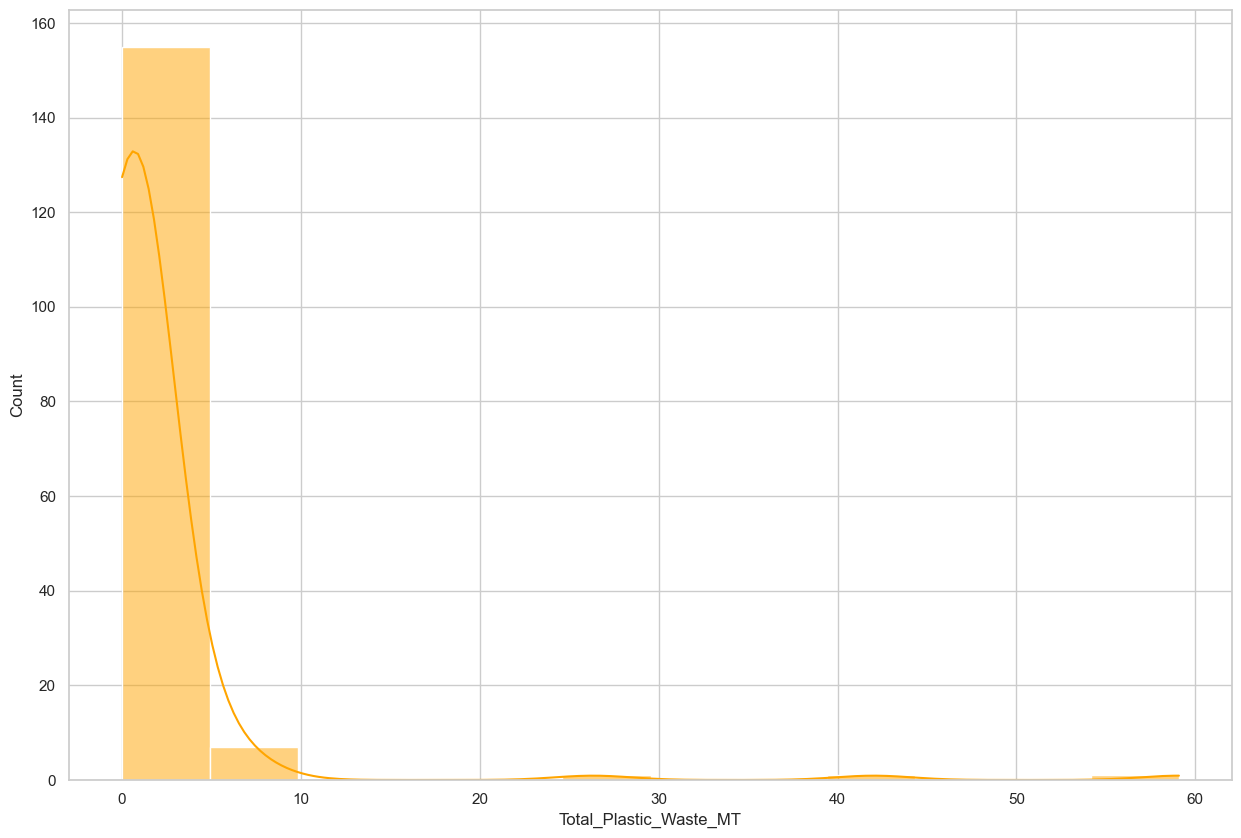

In [177]:
plt.figure(figsize = (15,10))
sns.histplot(data= df , x = "Total_Plastic_Waste_MT",color = 'orange', bins = 12
            ,kde = True)
plt.title("Distribution of Platsic Waste by Metric Tons")

TypeError: 'str' object is not callable

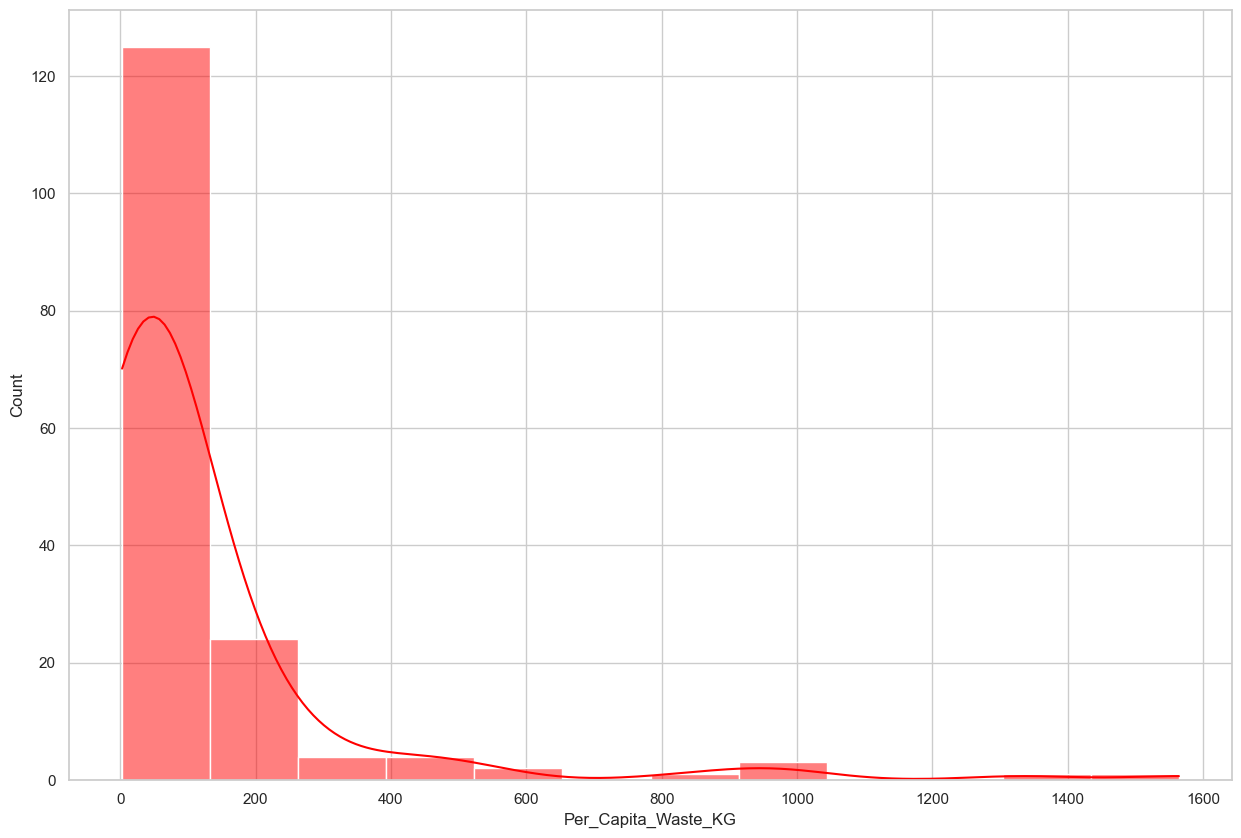

In [179]:
plt.figure(figsize = (15,10))

sns.histplot(data= df , x = "Per_Capita_Waste_KG",color = 'red', bins = 12
            ,kde = True)
plt.title("Distribution of Per_Capita_Waste_KG")

TypeError: 'str' object is not callable

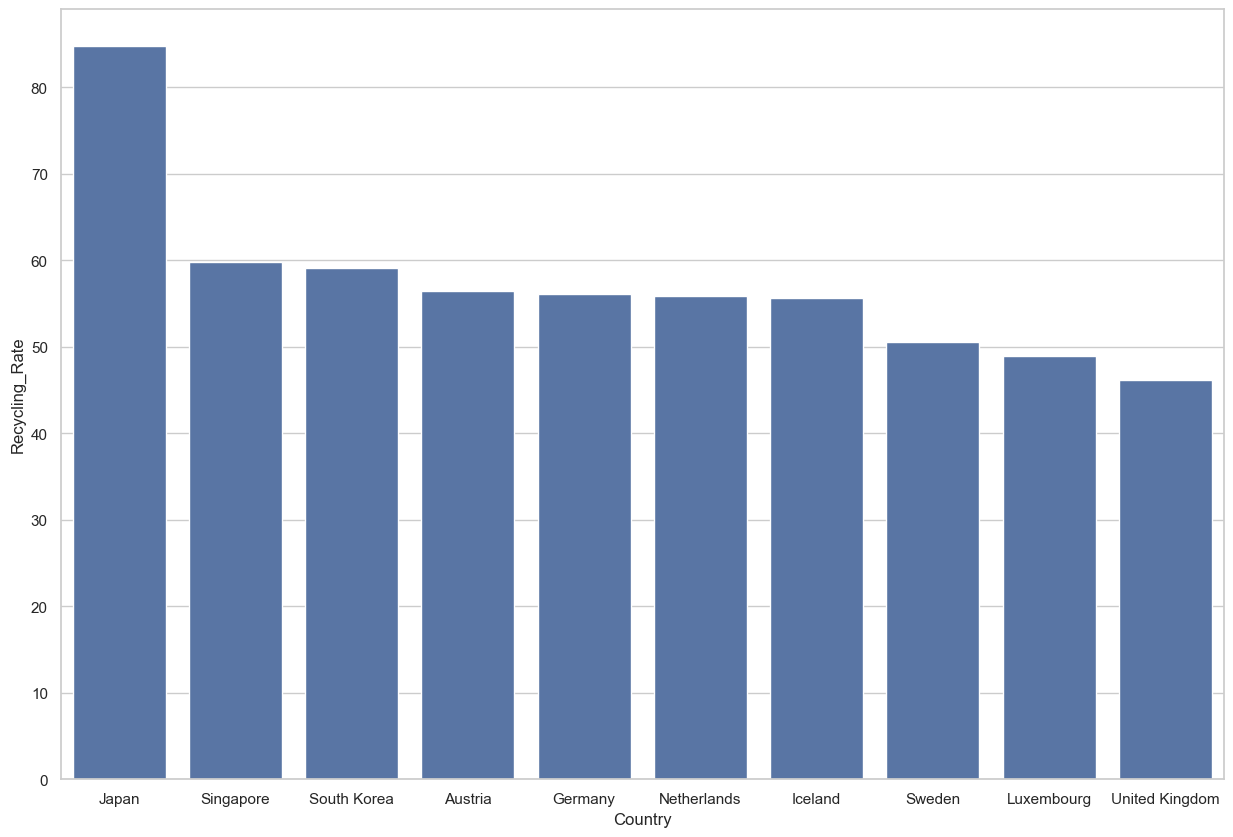

In [181]:
country_highest_waste_10 = df.nlargest(n= 10, columns = "Recycling_Rate" )
plt.figure(figsize = (15,10))
sns.barplot(data=country_highest_waste_10,  x= 'Country', y = "Recycling_Rate" )
plt.title("Countries with Highest Recycling Rates")

TypeError: 'str' object is not callable

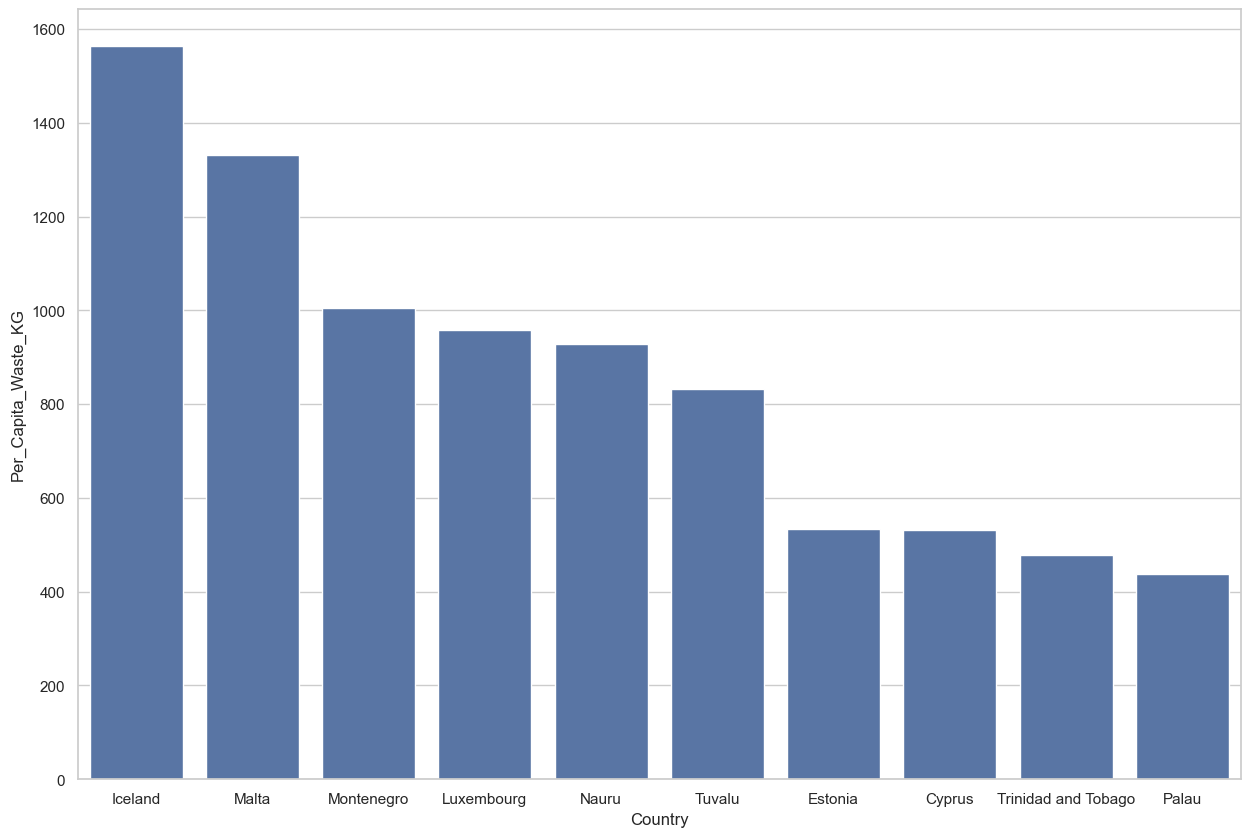

In [183]:
country_highest_waste_10 = df.nlargest(n= 10, columns = "Per_Capita_Waste_KG" )
plt.figure(figsize = (15,10))
sns.barplot(data=country_highest_waste_10,  x= 'Country', y = "Per_Capita_Waste_KG" )
plt.title("Countries with Highest Per_Capita_Waste_KG")

In [185]:
df.describe(include='all')

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,name,Adjusted_Per_Capita_Waste_KG,Waste_to_Recycling_Ratio
count,165,165.000000,165,165.000000,165.000000,165,165,165.000000,165.000000
unique,165,NaN,10,NaN,NaN,4,165,NaN,NaN
top,China,NaN,Consumer_Packaging,NaN,NaN,High,China,NaN,NaN
freq,1,NaN,131,NaN,NaN,74,1,NaN,NaN
mean,NaN,1.723515,NaN,13.096364,122.255152,NaN,NaN,90.303030,53.142910
std,NaN,6.001944,NaN,16.687354,222.849695,NaN,NaN,100.876361,185.716694
min,NaN,0.010000,NaN,0.100000,2.600000,NaN,NaN,2.600000,0.201342
25%,NaN,0.120000,NaN,1.200000,17.300000,NaN,NaN,17.300000,4.117647
50%,NaN,0.510000,NaN,5.400000,54.900000,NaN,NaN,54.900000,11.250000
75%,NaN,1.330000,NaN,16.400000,127.500000,NaN,NaN,127.500000,34.424779


In [187]:
df.isna().sum()

Country                         0
Total_Plastic_Waste_MT          0
Main_Sources                    0
Recycling_Rate                  0
Per_Capita_Waste_KG             0
Coastal_Waste_Risk              0
name                            0
Adjusted_Per_Capita_Waste_KG    0
Waste_to_Recycling_Ratio        0
dtype: int64

In [189]:
df.isnull().sum()

Country                         0
Total_Plastic_Waste_MT          0
Main_Sources                    0
Recycling_Rate                  0
Per_Capita_Waste_KG             0
Coastal_Waste_Risk              0
name                            0
Adjusted_Per_Capita_Waste_KG    0
Waste_to_Recycling_Ratio        0
dtype: int64

In [191]:
df.duplicated().sum()

0

In [193]:
df.nunique()

Country                         165
Total_Plastic_Waste_MT          122
Main_Sources                     10
Recycling_Rate                   83
Per_Capita_Waste_KG             146
Coastal_Waste_Risk                4
name                            165
Adjusted_Per_Capita_Waste_KG    134
Waste_to_Recycling_Ratio        156
dtype: int64

TypeError: 'str' object is not callable

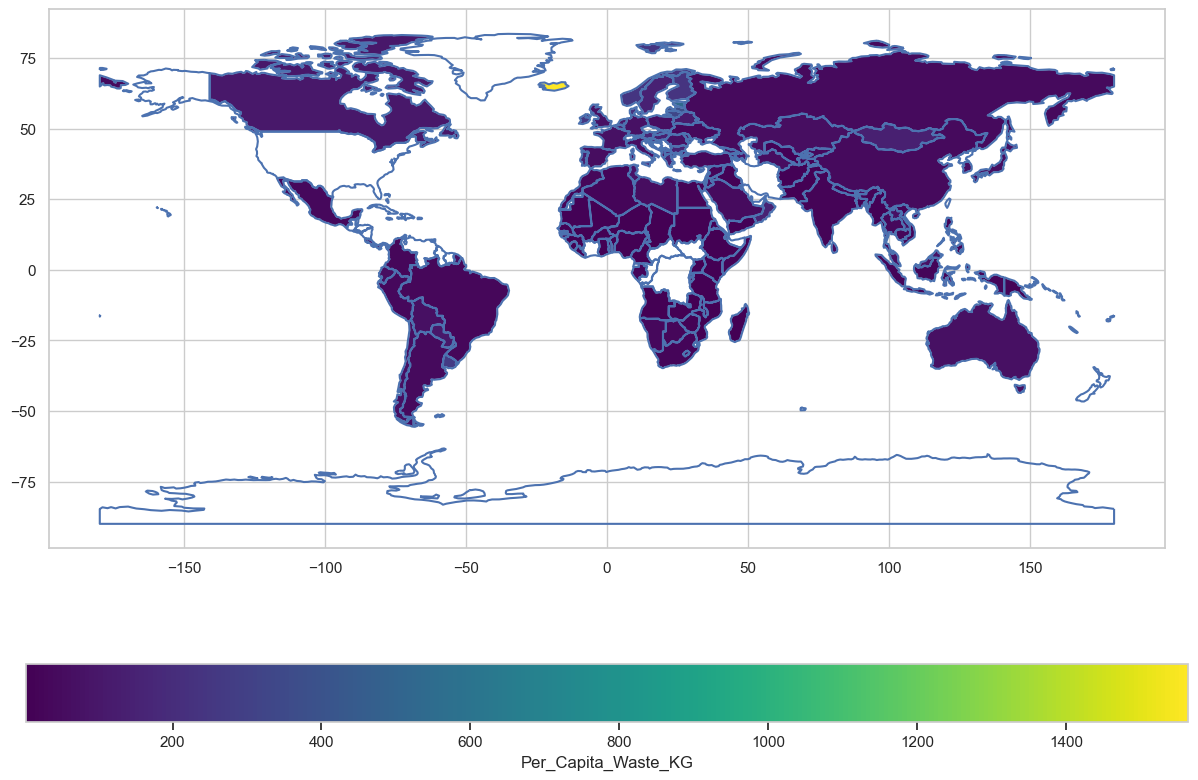

In [195]:
#World Map EDA
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Per_Capita_Waste_KG', ax=ax, legend=True, cmap='viridis',
           legend_kwds={'label': "Per_Capita_Waste_KG",
                        'orientation': "horizontal"})

plt.title('World Distribution of Per_Capita_Waste_KG', fontsize=16)
plt.show()

TypeError: 'str' object is not callable

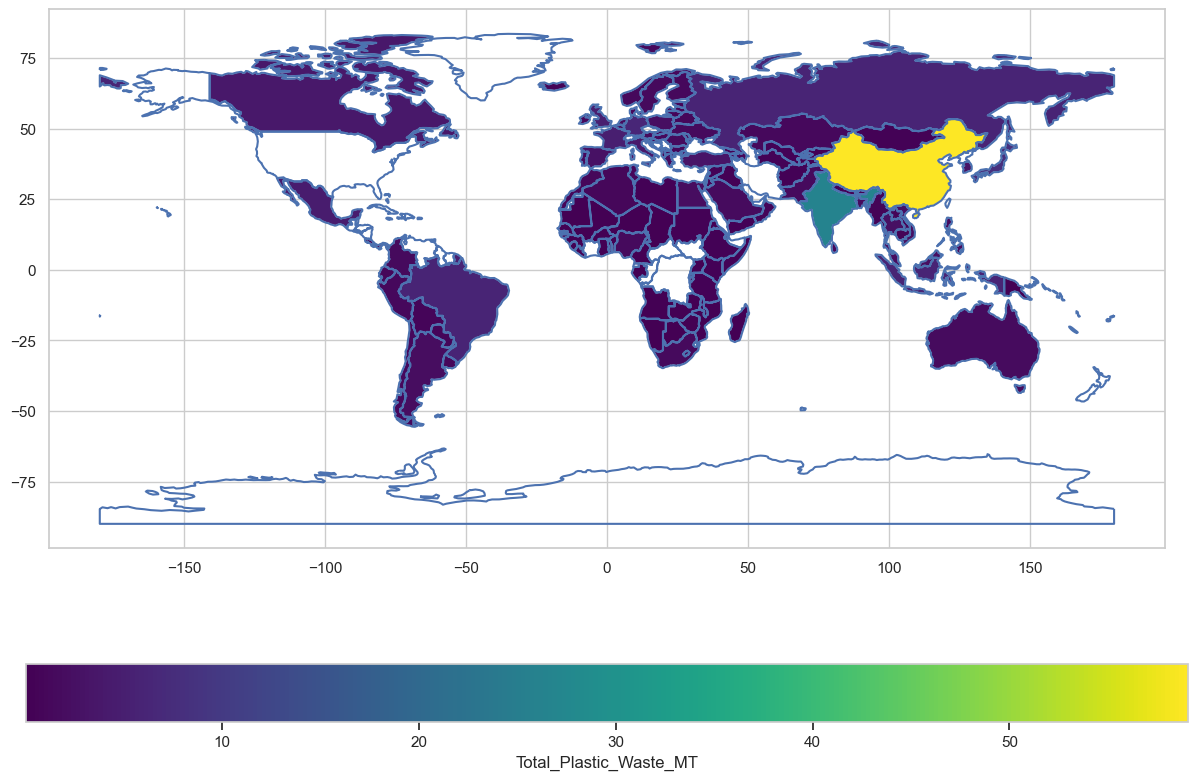

In [197]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Total_Plastic_Waste_MT', ax=ax, legend=True, cmap='viridis',
           legend_kwds={'label': "Total_Plastic_Waste_MT",
                        'orientation': "horizontal"})

plt.title('World Distribution of Total_Plastic_Waste_MT', fontsize=16)
plt.show()

TypeError: 'str' object is not callable

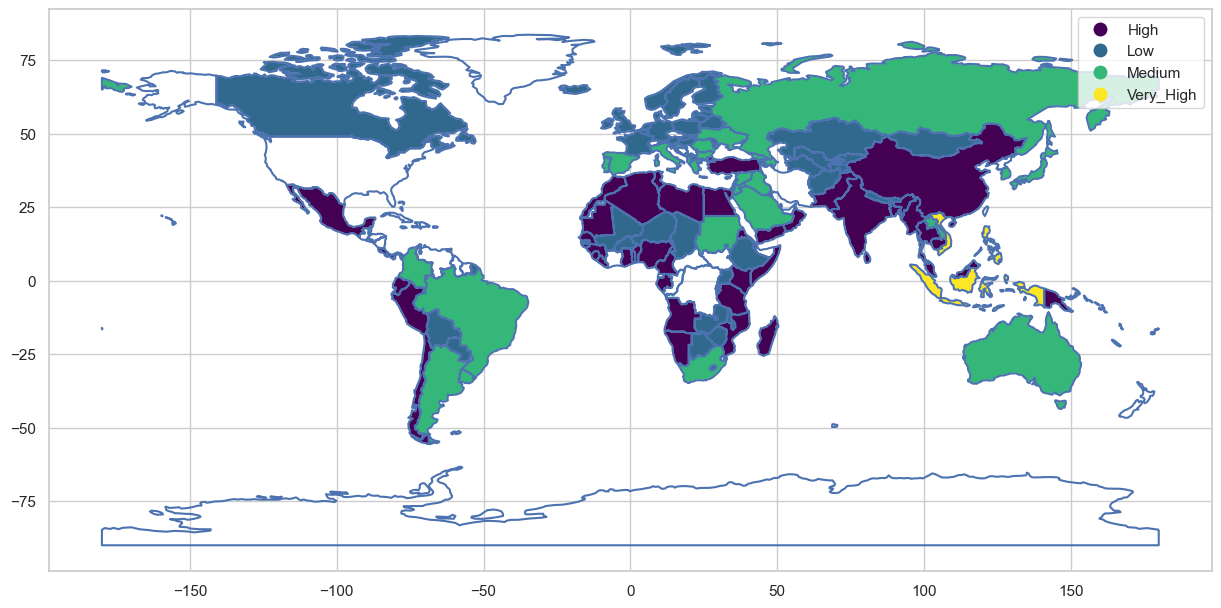

In [199]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Coastal_Waste_Risk', ax=ax, legend=True, cmap='viridis')

plt.title('World Distribution of Coastal_Waste_Risk', fontsize=16)
plt.show()

TypeError: 'str' object is not callable

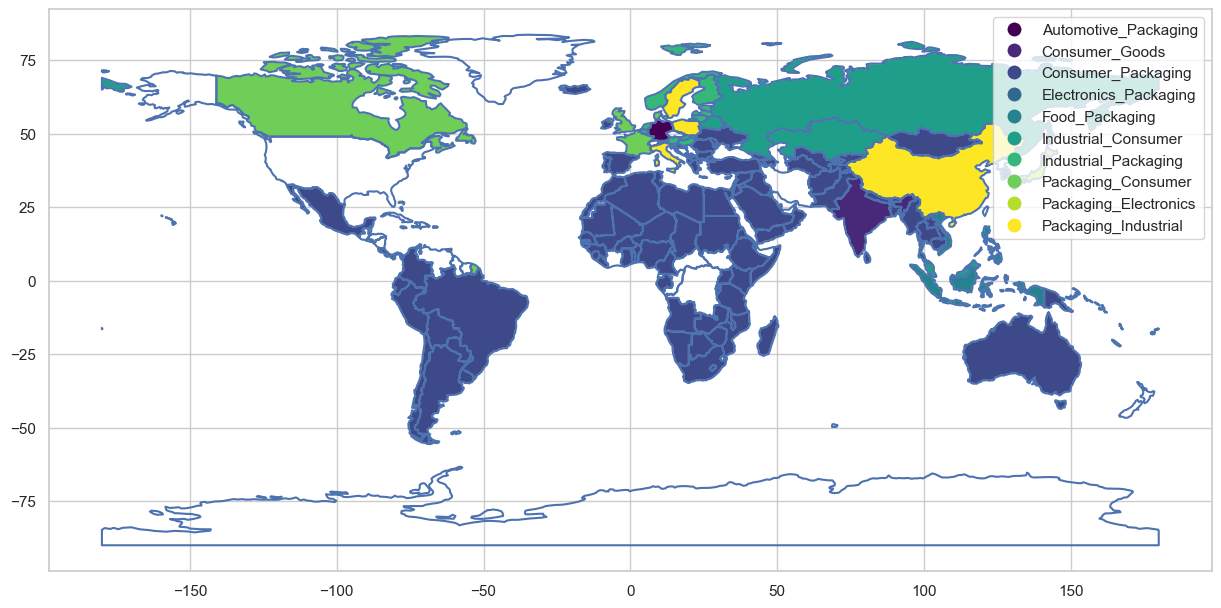

In [201]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Main_Sources', ax=ax, legend=True, cmap='viridis')

plt.title('World Distribution of Main_Sources', fontsize=16)
plt.show()

In [203]:
coastal_risk_counts = df['Coastal_Waste_Risk'].value_counts()
coastal_risk_counts

Coastal_Waste_Risk
High         74
Low          54
Medium       33
Very_High     4
Name: count, dtype: int64

In [205]:
high_risk = df[df['Coastal_Waste_Risk']=='High']['Coastal_Waste_Risk'].count()
low_risk = df[df['Coastal_Waste_Risk']=='Low']['Coastal_Waste_Risk'].count()
medium_risk = df[df['Coastal_Waste_Risk']=='Medium']['Coastal_Waste_Risk'].count()
very_high_risk = df[df['Coastal_Waste_Risk']=='Very_High']['Coastal_Waste_Risk'].count()

TypeError: 'str' object is not callable

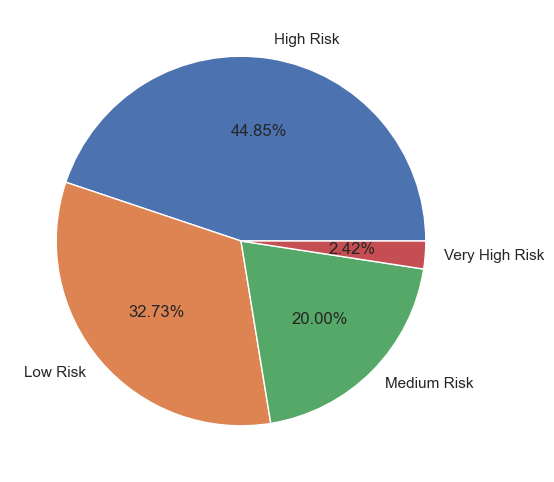

In [207]:
plt.figure(figsize=(10,6))

index_values = [high_risk, low_risk, medium_risk, very_high_risk]
index_labels = ['High Risk', 'Low Risk', 'Medium Risk', 'Very High Risk']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Coastal Risk Distribution', fontsize=20)

plt.show()

TypeError: 'str' object is not callable

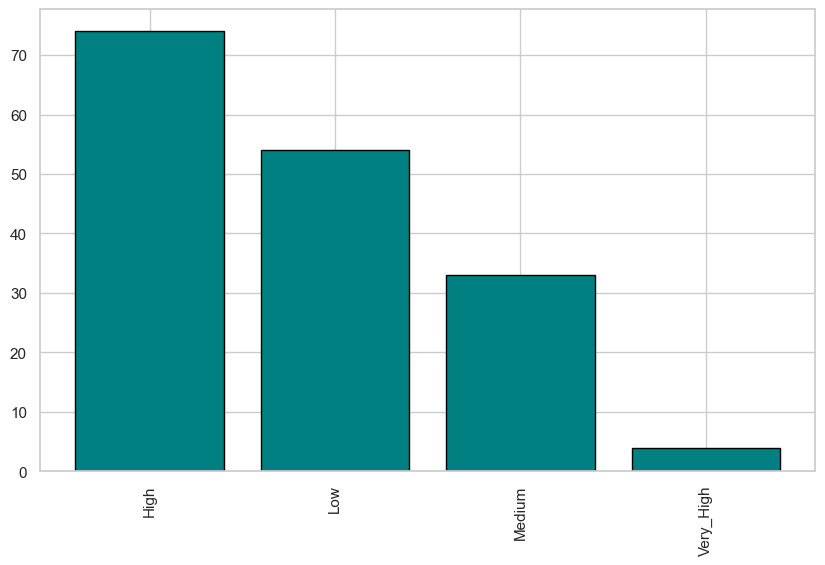

In [209]:
plt.figure(figsize=(10,6))

plt.bar(coastal_risk_counts.index, coastal_risk_counts.values, color='teal', edgecolor='black')

plt.xticks(coastal_risk_counts.index, coastal_risk_counts.index, rotation = 90)

plt.xlabel('Coastal Risk Intensity', fontsize=17)
plt.ylabel('Total Counts in the Dataset', fontsize=17)

plt.title('Overall Distribution of Coastal Risk Intensity', fontsize=19)

plt.show()

In [211]:
main_sources_counts = df['Main_Sources'].value_counts()
main_sources_counts

Main_Sources
Consumer_Packaging       131
Industrial_Packaging      14
Packaging_Consumer         5
Packaging_Industrial       4
Industrial_Consumer        4
Food_Packaging             3
Consumer_Goods             1
Packaging_Electronics      1
Automotive_Packaging       1
Electronics_Packaging      1
Name: count, dtype: int64

TypeError: 'str' object is not callable

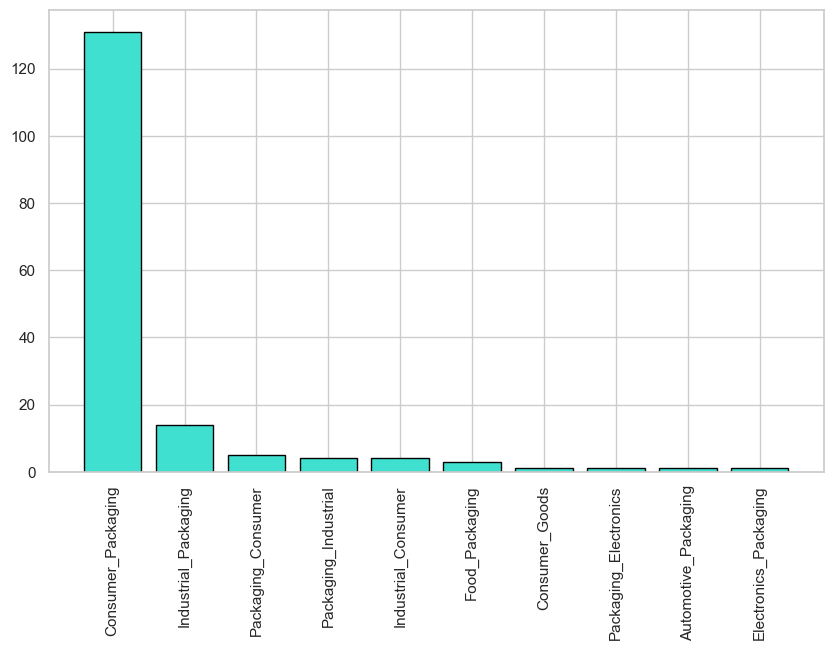

In [213]:
plt.figure(figsize=(10,6))

plt.bar(main_sources_counts.index, main_sources_counts.values, color='turquoise', edgecolor='black')

plt.xticks(main_sources_counts.index, main_sources_counts.index, rotation = 90)

plt.xlabel('Main Sources', fontsize=17)
plt.ylabel('Total Counts in the Dataset', fontsize=17)

plt.title('Overall Distribution of Main Sources', fontsize=19)

plt.show()

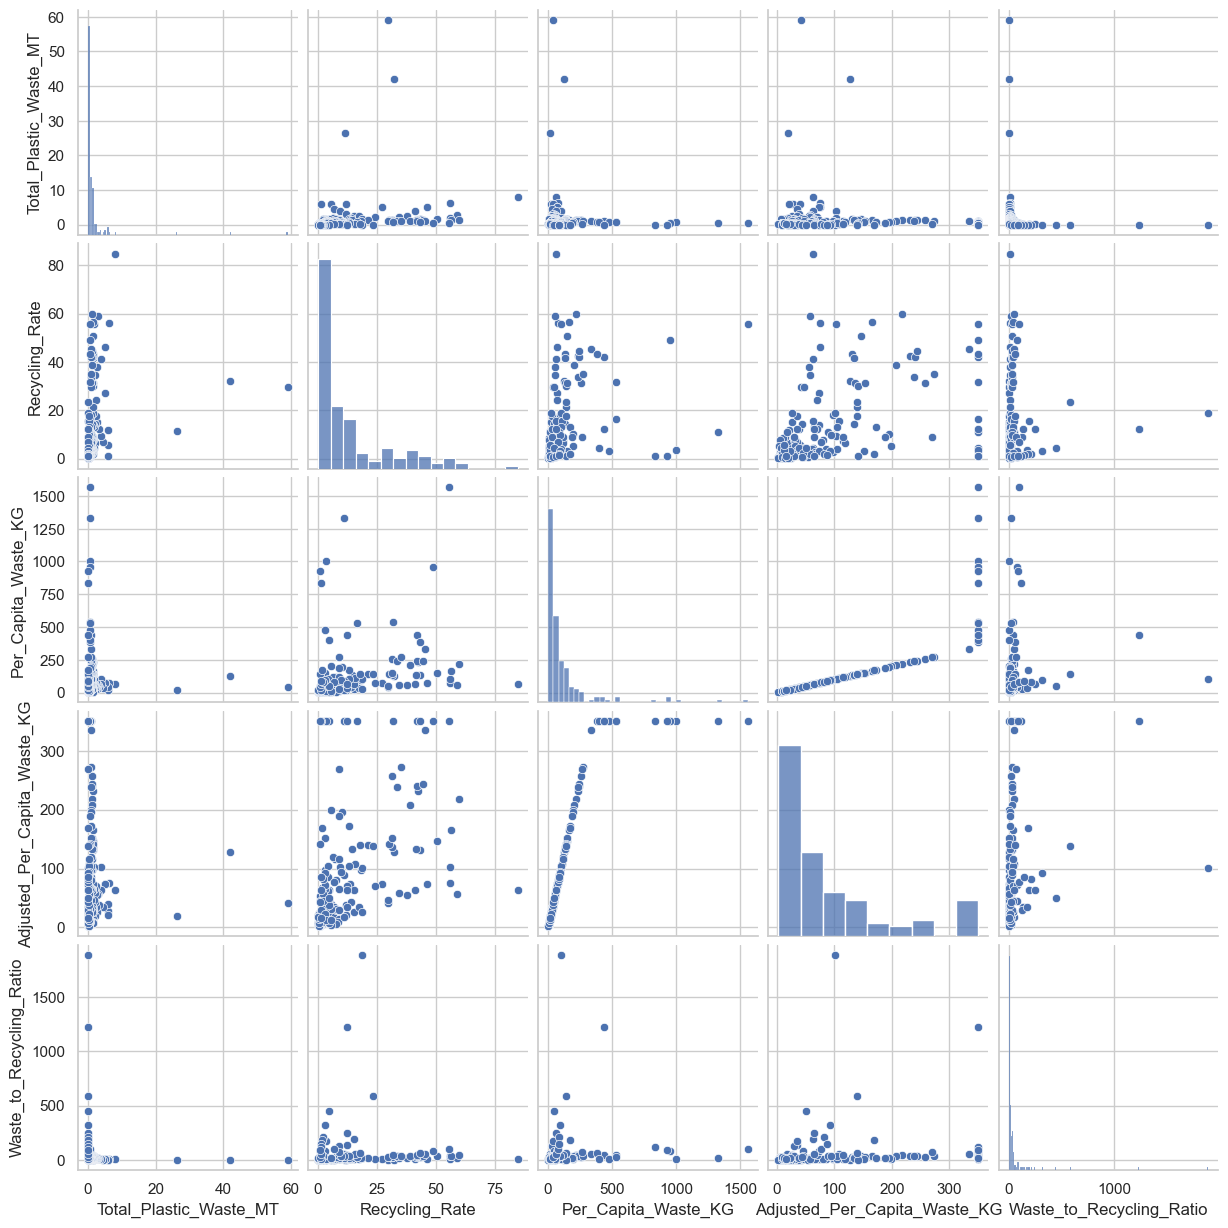

In [215]:
#Multivariate Analysis
sns.pairplot(df)

TypeError: 'str' object is not callable

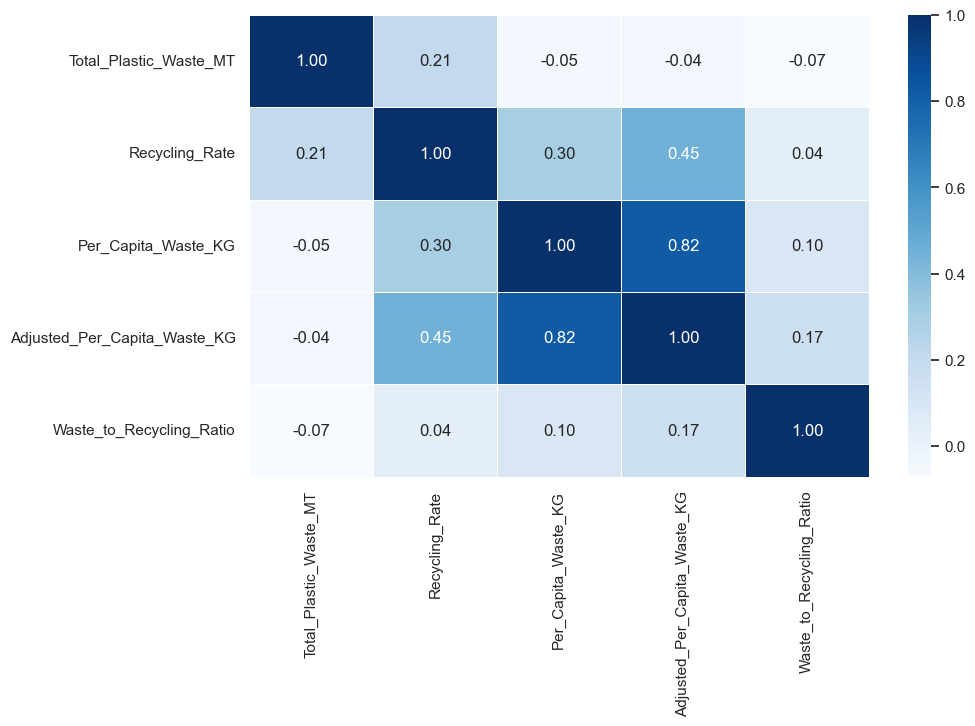

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all columns except 'Country' are numeric
corr_matrix = df.drop(columns=['Country']).select_dtypes(include=['number']).corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

# Add titles and adjust layout
plt.title('Correlation Heatmap', fontsize=23)
plt.tight_layout()
plt.show()

In [221]:
#Classification Model 1: RandomForest Classifier
from sklearn.preprocessing import LabelEncoder
df['Coastal_Waste_Risk'] = LabelEncoder().fit_transform(df['Coastal_Waste_Risk'])
df['Coastal_Waste_Risk']

0      0
1      2
2      0
3      2
4      1
      ..
160    0
161    0
162    0
163    0
164    0
Name: Coastal_Waste_Risk, Length: 165, dtype: int64

In [223]:
df['Main_Sources'] = LabelEncoder().fit_transform(df['Main_Sources'])
df['Main_Sources']

0      9
1      7
2      1
3      8
4      0
      ..
160    2
161    2
162    2
163    2
164    2
Name: Main_Sources, Length: 165, dtype: int64

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [227]:
features = df.drop(columns=['Country', 'Main_Sources'])
target = df['Main_Sources']

In [229]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

In [231]:
scaler = StandardScaler()

In [237]:
print(X_train.info())
print(X_train.head())

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 119 to 115
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Total_Plastic_Waste_MT        132 non-null    float64
 1   Recycling_Rate                132 non-null    float64
 2   Per_Capita_Waste_KG           132 non-null    float64
 3   Coastal_Waste_Risk            132 non-null    int64  
 4   name                          132 non-null    object 
 5   Adjusted_Per_Capita_Waste_KG  132 non-null    float64
 6   Waste_to_Recycling_Ratio      132 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.2+ KB
None
     Total_Plastic_Waste_MT  Recycling_Rate  Per_Capita_Waste_KG  \
119                    0.07             0.8                  8.3   
112                    0.01             0.8                 45.2   
101                    0.13             1.8                  6.9   
30                     1.53  

In [241]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [243]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=29)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=29)

In [245]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf

array([2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [247]:
y_test

100    2
137    2
31     6
93     2
124    2
39     6
160    2
2      1
155    2
63     2
147    2
126    2
136    2
127    2
120    2
87     2
45     2
53     5
161    2
89     2
157    2
28     2
27     2
73     2
110    2
90     2
149    2
48     5
10     2
7      5
128    2
125    2
98     2
Name: Main_Sources, dtype: int64

In [249]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8484848484848485

In [253]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


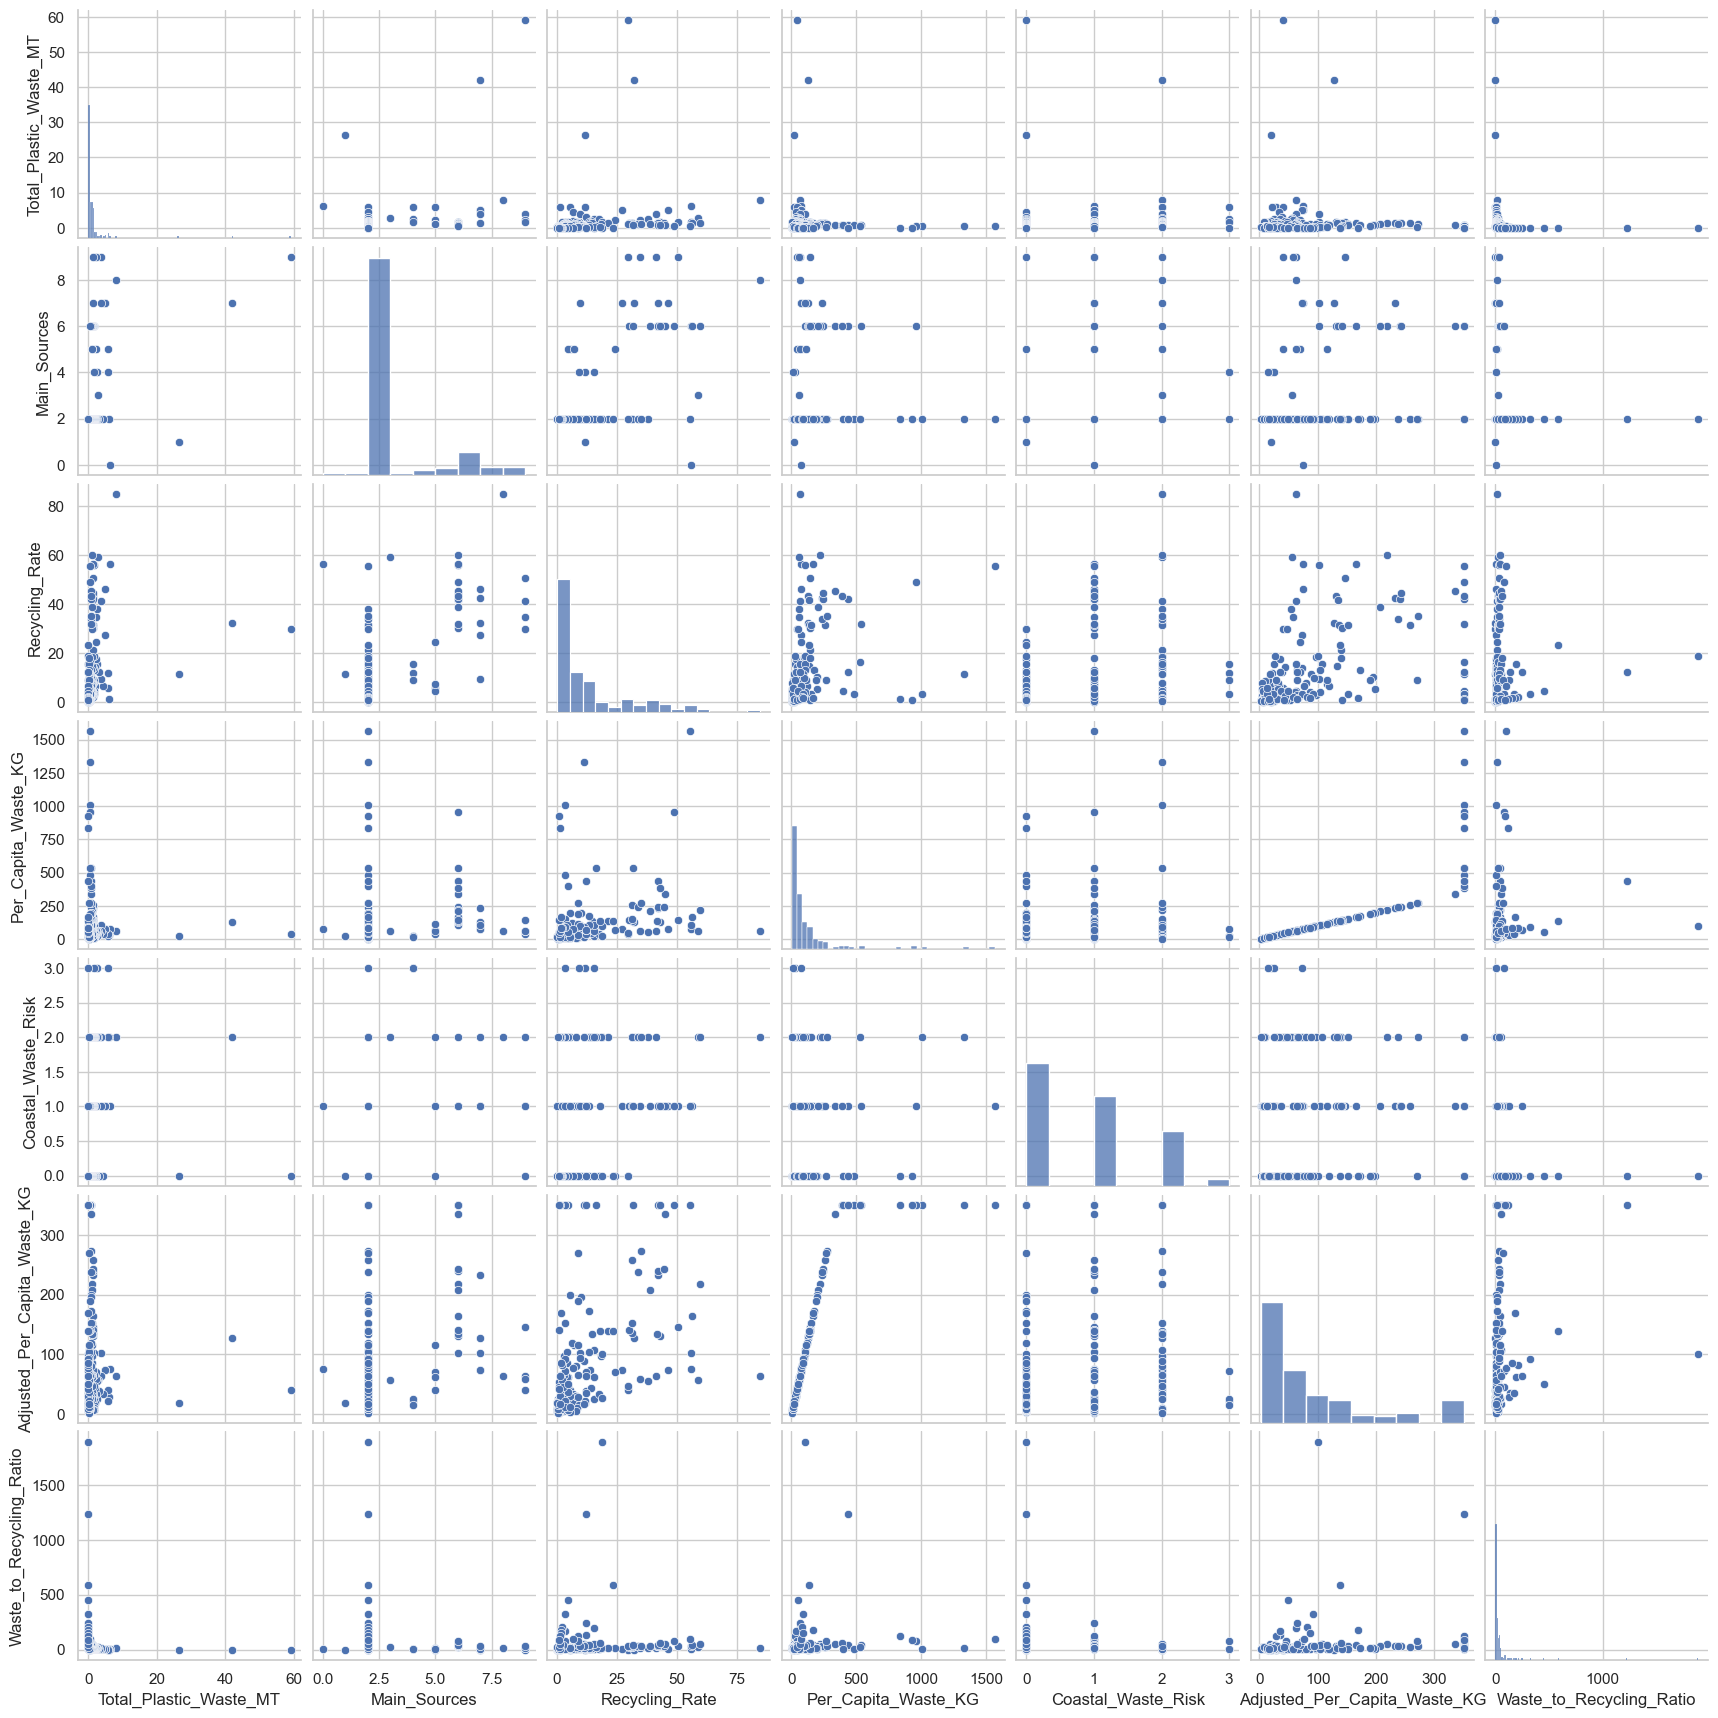

In [257]:
#Multivariate Analysis
sns.pairplot(df)